# Milestone-1

## 1- Perkenalan

> Bab pengenalan harus diisi dengan identitas, query yang telah kalian buat pada Google Cloud Platform!, dan objective yang ingin dicapai.

- Nama : Muhammad Irham Dinan
- Batch : FTDS-012
- Dataset : `bigquery-public-data.ml_datasets.credit_card_default`
- Tujuan : Membuat model Classification untuk memprediksi `default_payment_next_month` menggunakan dataset sudah disimpan.

*Query*:

SELECT cc.limit_balance, cc.sex, cc.education_level, cc.marital_status, cc.age, cc.pay_0, cc.pay_2, cc.pay_3, cc.pay_4, cc.pay_5, cc.pay_6, cc.bill_amt_1, cc.bill_amt_2, cc.bill_amt_3, cc.bill_amt_4, cc.bill_amt_5, cc.bill_amt_6, cc.pay_amt_1, cc.pay_amt_2, cc.pay_amt_3, cc.pay_amt_4, cc.pay_amt_5, cc.pay_amt_6, cc.default_payment_next_month
FROM `bigquery-public-data.ml_datasets.credit_card_default` as cc
LIMIT 23940

## 2- Import Library

> Cell pertama pada notebook harus berisi dan hanya berisi semua library yang digunakan dalam project.

In [1]:
# Importasi library yang akan dipakai

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from feature_engine.outliers import Winsorizer
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import OneHotEncoder 
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay,confusion_matrix

## 3- Data Loading

> Bagian ini berisi proses penyiapan data sebelum dilakukan eksplorasi data lebih lanjut. Proses Data Loading dapat berupa memberi nama baru untuk setiap kolom, mengecek ukuran dataset, dll.

In [2]:
# Memasukan dataset .csv ke dalam variabel data

path = 'h8dsft_P1M1_muhammad-irham-dinan.csv'
data = pd.read_csv(path)

In [3]:
# Menampilkan tinjauan 5 teratas dari dataset

data.head()

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,50000.0,1,1,2,39.0,0.0,0.0,0.0,0.0,0,...,50803.0,30789.0,15874.0,1800.0,2000.0,3000.0,2000.0,2000.0,2000.0,0
1,110000.0,2,1,2,29.0,0.0,0.0,0.0,0.0,0,...,32489.0,26354.0,20221.0,2000.0,2010.0,3000.0,3000.0,3000.0,1000.0,0
2,270000.0,1,1,2,36.0,0.0,0.0,0.0,2.0,0,...,40335.0,37165.0,22156.0,10076.0,4018.0,14.0,2051.0,2000.0,0.0,0
3,130000.0,1,1,1,45.0,0.0,0.0,0.0,0.0,0,...,62377.0,63832.0,65099.0,2886.0,2908.0,2129.0,2354.0,2366.0,2291.0,0
4,50000.0,1,1,2,24.0,0.0,0.0,0.0,0.0,0,...,19837.0,19855.0,20151.0,1367.0,1606.0,692.0,709.0,721.0,692.0,0


In [4]:
# Menampilkan tinjauan 5 terbawah dari dataset

data.tail()

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
2960,210000.0,2,2,1,39.0,-1.0,-1.0,-1.0,-1.0,-2,...,0.0,0.0,12000.0,0.0,28428.0,0.0,0.0,12000.0,33664.0,0
2961,280000.0,2,1,1,41.0,2.0,-1.0,-1.0,-1.0,-2,...,0.0,0.0,244.0,6859.0,486.0,0.0,0.0,244.0,0.0,0
2962,80000.0,1,1,2,28.0,1.0,-1.0,-1.0,-1.0,-2,...,0.0,0.0,0.0,47.0,207.0,0.0,0.0,0.0,0.0,0
2963,200000.0,1,2,1,53.0,1.0,-1.0,-1.0,-2.0,-2,...,0.0,0.0,6753.0,2920.0,0.0,0.0,0.0,6753.0,0.0,1
2964,20000.0,2,1,2,24.0,-1.0,-1.0,-2.0,-2.0,-2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [5]:
# Menduplikasi dataset yang asli ke dalam variabel data_original

data_original = data.copy()

In [6]:
# Memeriksa dataset melalui .info()

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2965 entries, 0 to 2964
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   limit_balance               2965 non-null   float64
 1   sex                         2965 non-null   int64  
 2   education_level             2965 non-null   int64  
 3   marital_status              2965 non-null   int64  
 4   age                         2965 non-null   float64
 5   pay_0                       2965 non-null   float64
 6   pay_2                       2965 non-null   float64
 7   pay_3                       2965 non-null   float64
 8   pay_4                       2965 non-null   float64
 9   pay_5                       2965 non-null   int64  
 10  pay_6                       2965 non-null   int64  
 11  bill_amt_1                  2965 non-null   float64
 12  bill_amt_2                  2965 non-null   float64
 13  bill_amt_3                  2965 

Berdasarkan sajian di atas, dapat dilihat bahwa tidak terdapat missing values berdasarkan keterangan non-null pada kolom-kolom yang telah di-*query* dari GCP

In [7]:
# Memeriksa informasi deskriptif statistik pada dataset

data.describe().T

,count,mean,std,min,25%,50%,75%,max
limit_balance,2965.0,163369.308600,125030.415472,10000.0,50000.0,140000.0,230000.0,800000.0
sex,2965.0,1.607757,0.488333,1.0,1.0,2.0,2.0,2.0
education_level,2965.0,1.849578,0.778184,0.0,1.0,2.0,2.0,6.0
marital_status,2965.0,1.559865,0.522317,0.0,1.0,2.0,2.0,3.0
age,2965.0,35.193255,9.109439,21.0,28.0,34.0,41.0,69.0
pay_0,2965.0,0.005059,1.114395,-2.0,-1.0,0.0,0.0,8.0
pay_2,2965.0,-0.122428,1.180784,-2.0,-1.0,0.0,0.0,7.0
pay_3,2965.0,-0.141653,1.183630,-2.0,-1.0,0.0,0.0,7.0
pay_4,2965.0,-0.185160,1.178322,-2.0,-1.0,0.0,0.0,8.0
pay_5,2965.0,-0.225295,1.159003,-2.0,-1.0,0.0,0.0,7.0


Berdasarkan sajian di atas, dapat dilihat bahwa beberapa kolom berjenis kategori/categorical values yang berlabel angka numerik bila ditinjau dari value min atau max yang memuat angka diskrit, yaitu pada kolom `sex`, `education_level`, `marital_status`, `pay_0`, `pay_2`, `pay_3`, `pay_4`, `pay_5`, dan `pay_6`.

Terdapat hal menarik pada kolom `limit_balance`, yaitu range nilai pada kolom `limit_balance` terpaut cukup jauh max = 800000 dan min = 10000, mengindikasikan dataset berasal dari data kustomer dengan limit rendah sampai dengan limit tinggi (nasabah prioritas). 

Selain itu, terdapat hal menarik juga pada kolom `bill_amt_1` s/d `bill_amt_6` dimana min value nya menunjukan angka negatif, atau bila ditinjau dari billing statement yang lazim pada tagihan dapat diartikan sebagai jumlah kelebihan bayar dari jumlah yang ditagihkan pada billing statement terakhirnya.

Hal menarik yang bisa ditinjau adalah min value = -2.0 pada kolom `pay_0` s/d `pay_6` dimana berdasarkan informasi detail kolom dari GCP seharusnya label paling kecil ialah -1.0 (pay duly), maka perlu dilakukan tinjuan/analisis khusus untuk kondisi ini di prosedur berikutnya.

## 4- Exploratory Data Analysis (EDA)

> Bagian ini berisi eksplorasi data pada dataset diatas dengan menggunakan query, grouping, visualisasi sederhana, dan lain sebagainya.

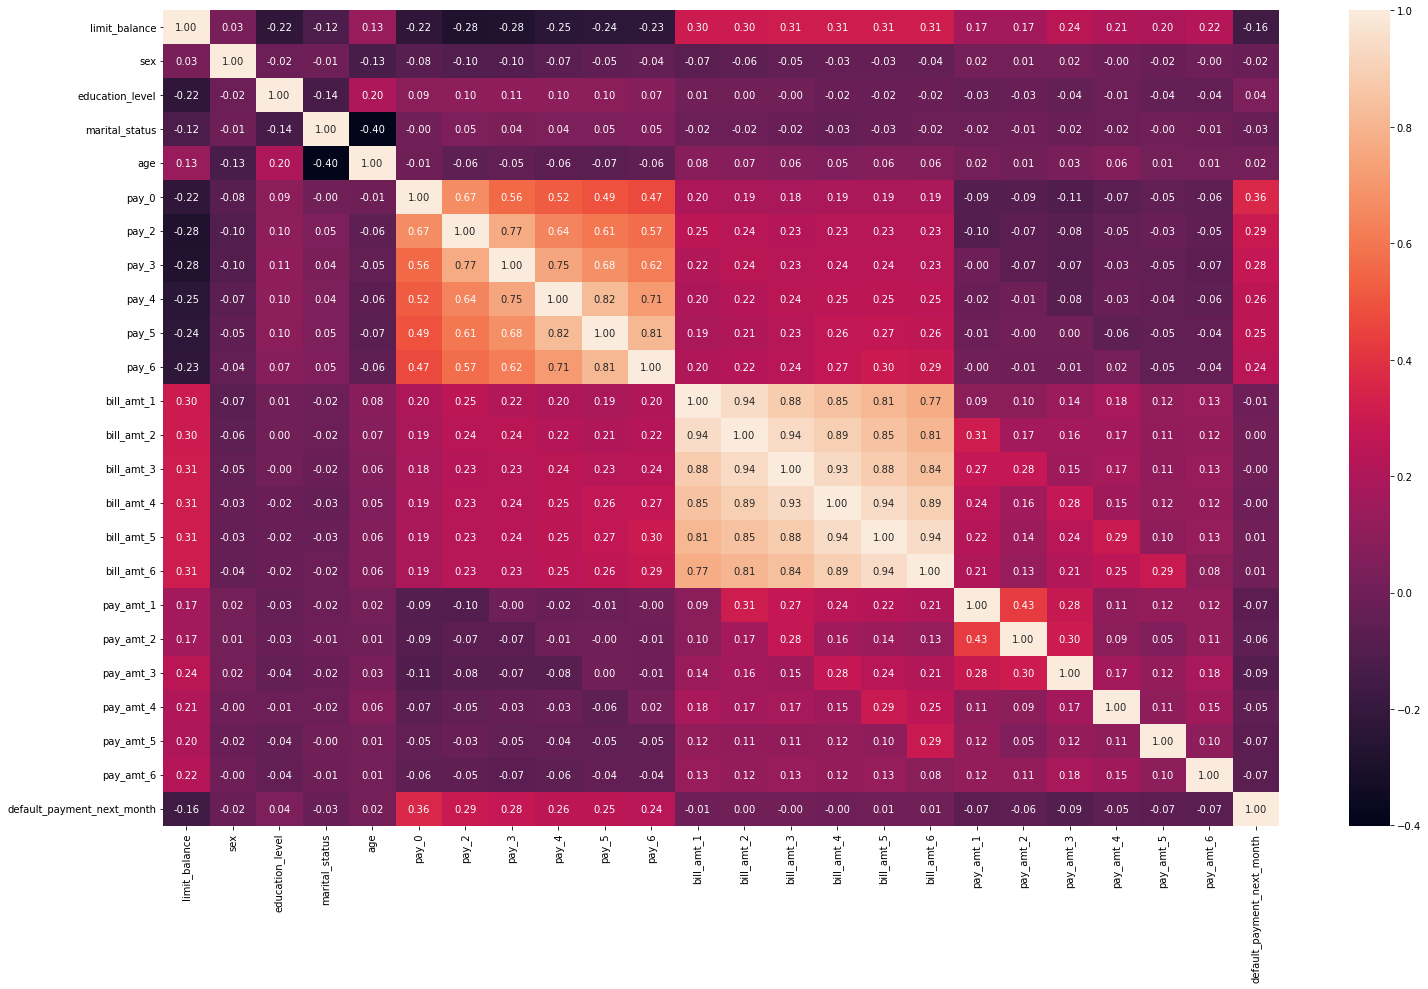

In [8]:
# Membuat visualisasi korelasi melalui plot .heatmap()

plt.figure(figsize=(25,15))
sns.heatmap(data.corr(), annot=True, fmt='.2f')
plt.show()

Berdasarkan sajian visualisasi heatmap correlation di atas, dapat dilihat bahwa untuk *features* yang memiliki korelasi cukup baik yaitu `pay_0`, `pay_2`, `pay_3`, `pay_4`, `pay_5`, dan `pay_6` dengan angka korelasi 0.24 ~ 0.36, namun *features* tersebut akan dievaluasi EDAnya kembali dengan meninjau sebagai data kategori / categorical values melalui countplot visualisasi. 

Untuk *features* dengan data numerik pada kolom `bill_amt_1` s/d `bill_amt_6` dan `age` menunjukan angka korelasi yang sangat kecil (mendekati 0) atau berkorelasi lemah dengan target `default_payment_next_month`. Sementara, untuk *features* dengan data numerik pada kolom `limit_balance` menunjukan angka korelasi yang relatif lebih tinggi / berkorelasi cukup kuat yaitu dengan nilai korelasi -0.16.

Text(0.5, 1.0, 'Visualisasi Histogram Variabel age')

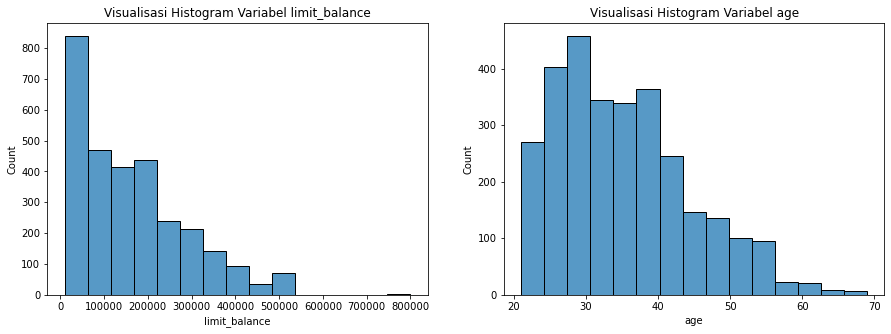

In [9]:
# Membuat visualisasi distribusi data melalui .histplot()

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
sns.histplot(data['limit_balance'], bins=15)
plt.title('Visualisasi Histogram Variabel limit_balance')

plt.subplot(1, 2, 2)
sns.histplot(data['age'], bins=15)
plt.title('Visualisasi Histogram Variabel age')

Berdasarkan sajian histogram di atas, dapat dilihat bahwa sebaran data `limit_balance` memiliki tail di sebelah kanan, atau dapat diasumsikan tidak berdistribusi normal. Sebagai besar limit nasabah berada di rentang 10000 ~ 220000 dimana setidaknya terdapat 400 data di setiap kelompok binsnya, sementara sangat sedikit sekali yang berada di rentang > 220000, terutama 800000 banyaknya data dapat dipastikan < 100.

Berdasarkan sajian histogram di atas, dapat dilihat bahwa sebaran data `age` memiliki tail di sebelah kanan, atau dapat diasumsikan tidak berdistribusi normal. Sebagai besar nasabah berada di rentang 21 ~ 40 tahun dimana setidaknya terdapat 200 data di setiap kelompok binsnya, sementara sangat sedikit sekali nasabah yang berusia di atas 50 tahun (kurang dari 100 data setiap kelompok binsnya).

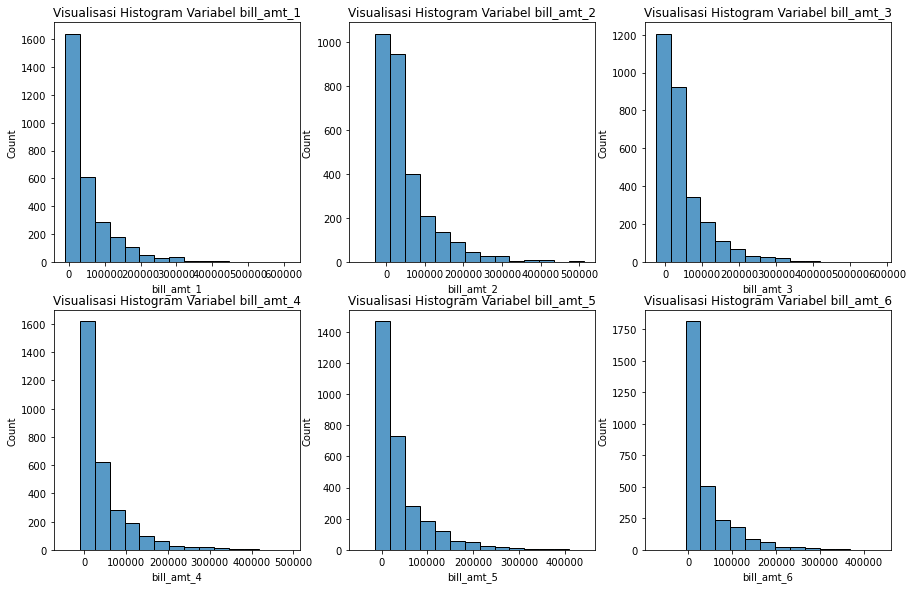

In [10]:
# Membuat visualisasi distribusi data melalui .histplot()

plt.figure(figsize=(15,15))

plt.subplot(3, 3, 1)
sns.histplot(data['bill_amt_1'], bins=15)
plt.title('Visualisasi Histogram Variabel bill_amt_1')

plt.subplot(3, 3, 2)
sns.histplot(data['bill_amt_2'], bins=15)
plt.title('Visualisasi Histogram Variabel bill_amt_2')

plt.subplot(3, 3, 3)
sns.histplot(data['bill_amt_3'], bins=15)
plt.title('Visualisasi Histogram Variabel bill_amt_3')

plt.subplot(3, 3, 4)
sns.histplot(data['bill_amt_4'], bins=15)
plt.title('Visualisasi Histogram Variabel bill_amt_4')

plt.subplot(3, 3, 5)
sns.histplot(data['bill_amt_5'], bins=15)
plt.title('Visualisasi Histogram Variabel bill_amt_5')

plt.subplot(3, 3, 6)
sns.histplot(data['bill_amt_6'], bins=15)
plt.title('Visualisasi Histogram Variabel bill_amt_6')

plt.show()

Berdasarkan sajian histogram di atas, dapat dilihat bahwa sebaran data `bill_amt_1` s/d `bill_amt_6`  memiliki tail di sebelah kanan, atau dapat diasumsikan tidak berdistribusi normal. Sebagai besar nasabah tidak memiliki tagihan / bill amount di rentang `bill_amt_1` s/d `bill_amt_6` karena didominasi oleh kelompok bins negatif - 0.

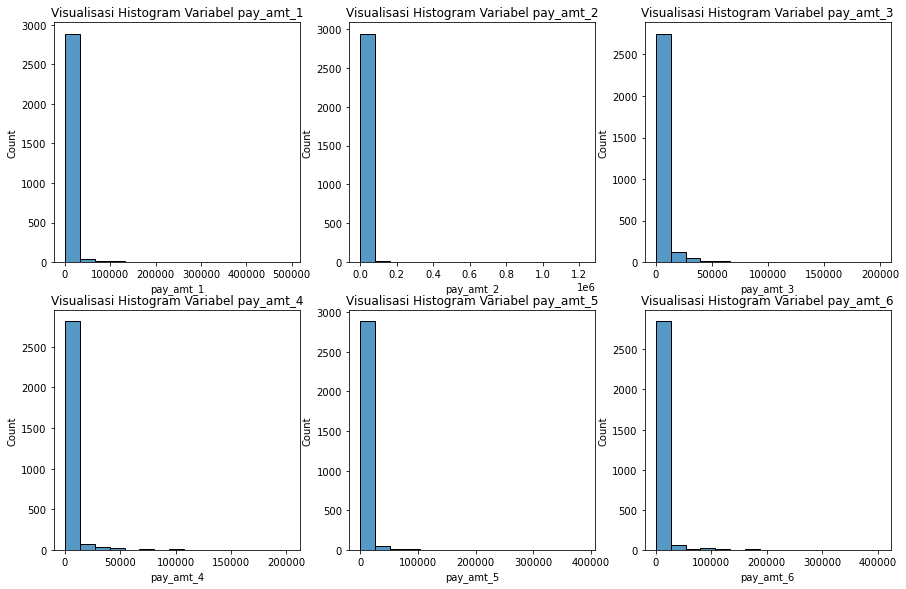

In [11]:
# Membuat visualisasi distribusi data melalui .histplot()

plt.figure(figsize=(15,15))

plt.subplot(3, 3, 1)
sns.histplot(data['pay_amt_1'], bins=15)
plt.title('Visualisasi Histogram Variabel pay_amt_1')

plt.subplot(3, 3, 2)
sns.histplot(data['pay_amt_2'], bins=15)
plt.title('Visualisasi Histogram Variabel pay_amt_2')

plt.subplot(3, 3, 3)
sns.histplot(data['pay_amt_3'], bins=15)
plt.title('Visualisasi Histogram Variabel pay_amt_3')

plt.subplot(3, 3, 4)
sns.histplot(data['pay_amt_4'], bins=15)
plt.title('Visualisasi Histogram Variabel pay_amt_4')

plt.subplot(3, 3, 5)
sns.histplot(data['pay_amt_5'], bins=15)
plt.title('Visualisasi Histogram Variabel pay_amt_5')

plt.subplot(3, 3, 6)
sns.histplot(data['pay_amt_6'], bins=15)
plt.title('Visualisasi Histogram Variabel pay_amt_6')

plt.show()

Berdasarkan sajian histogram di atas, dapat dilihat bahwa sebaran data `pay_amt_1` s/d `pay_amt_6`  memiliki tail di sebelah kanan, atau dapat diasumsikan tidak berdistribusi normal. Sebagai besar nasabah tidak melakukan sejumlah pembayaran tagihan atau melakukan pembayaran dalam jumlah yang relatif kecil / pay amount di rentang `bill_amt_1` s/d `bill_amt_6` karena didominasi oleh kelompok bins 0 s/d sejumlah amount tertentu yang relaitf kecil.

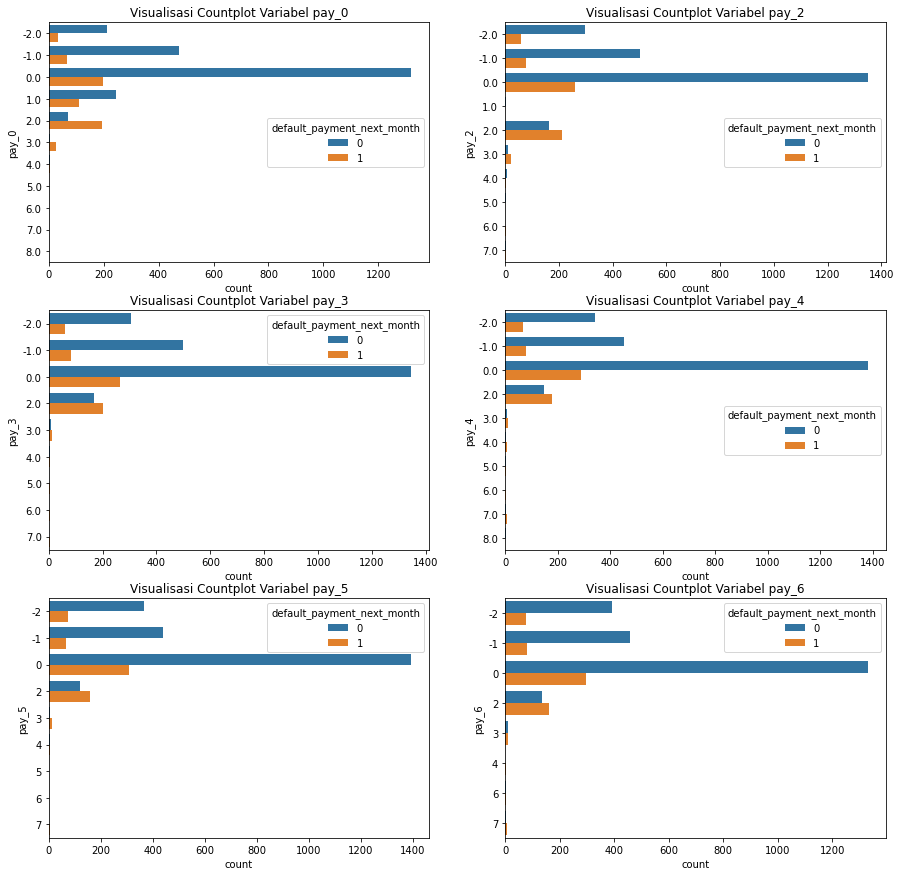

In [12]:
# Membuat visualisasi distribusi data melalui .countplot()

plt.figure(figsize=(15, 15))

plt.subplot(3, 2, 1)
sns.countplot(y='pay_0', hue='default_payment_next_month', data=data)
plt.title('Visualisasi Countplot Variabel pay_0')

plt.subplot(3, 2, 2)
sns.countplot(y='pay_2', hue='default_payment_next_month', data=data)
plt.title('Visualisasi Countplot Variabel pay_2')

plt.subplot(3, 2, 3)
sns.countplot(y='pay_3', hue='default_payment_next_month', data=data)
plt.title('Visualisasi Countplot Variabel pay_3')

plt.subplot(3, 2, 4)
sns.countplot(y='pay_4', hue='default_payment_next_month', data=data)
plt.title('Visualisasi Countplot Variabel pay_4')

plt.subplot(3, 2, 5)
sns.countplot(y='pay_5', hue='default_payment_next_month', data=data)
plt.title('Visualisasi Countplot Variabel pay_5')

plt.subplot(3, 2, 6)
sns.countplot(y='pay_6', hue='default_payment_next_month', data=data)
plt.title('Visualisasi Countplot Variabel pay_6')

plt.show()

Berdasarkan sajian di atas, dapat dilihat bahwa terdapat kekhasan tertentu pada kolom *features* `pay_0`, `pay_2`, `pay_3`, `pay_4`, `pay_5`, dan `pay_6` terhadap kolom *target* `default_payment_next_month`, yaitu secara umum didominasi oleh label `default_payment_next_month` = 0 untuk setiap kategori nilai, terkecuali pada kategori nilai >= `2.0` dimana menunjukan dominasi sebaliknya yaitu label `default_payment_next_month` = 1. Artinya, pada pay status nasabah yang memiliki label setidaknya minimal `2.0` atau lebih memiliki makna bahwa nasabah yang telah terlambat bayar selama 2 bulan atau lebih maka `default_payment_next_month` nya menjadi  =  1. 

Sehingga, features `pay_0`, `pay_2`, `pay_3`, `pay_4`, `pay_5`, dan `pay_6` patut dipertimbangkan memiliki korelasi kuat terhadap `default_payment_next_month`.

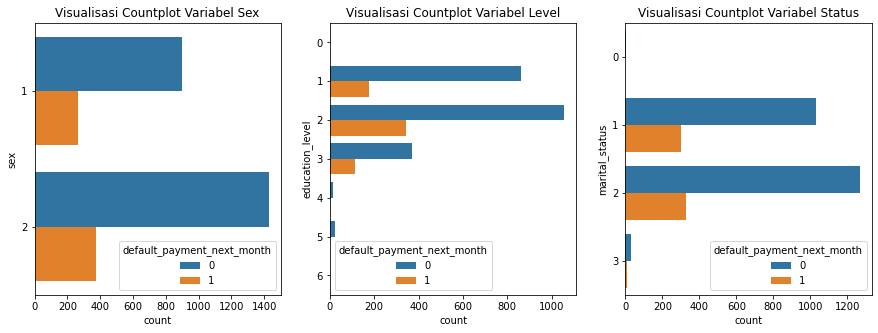

In [13]:
# Membuat visualisasi distribusi data melalui .countplot()

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.countplot(y='sex', hue='default_payment_next_month', data=data)
plt.title('Visualisasi Countplot Variabel Sex')

plt.subplot(1, 3, 2)
sns.countplot(y='education_level', hue='default_payment_next_month', data=data)
plt.title('Visualisasi Countplot Variabel Level')

plt.subplot(1, 3, 3)
sns.countplot(y='marital_status', hue='default_payment_next_month', data=data)
plt.title('Visualisasi Countplot Variabel Status')

plt.show()

Berdasarkan sajian di atas, dapat dilihat bahwa tidak terdapat kekhasan tertentu pada kolom *features* `sex`, `education_level`, dan `marital_status` terhadap kolom *target* `default_payment_next_month`, yaitu setiap kategori nilai seragam didominasi oleh label `default_payment_next_month` = 0. Sehingga, features `sex`, `education_level`, dan `marital_status` dianggap tidak memiliki korelasi yang cukup terhadap `default_payment_next_month`.

In [14]:
# Melakukan pengelompokan dan agregasi pada variabel limit_balance terhadap default_payment_next_month

data.groupby(by=['default_payment_next_month'])[['limit_balance']].mean().sort_values(by='limit_balance',ascending=False)

,limit_balance
default_payment_next_month,
0,173935.622318
1,124598.425197


Berdasarkan sajian di atas, dapat dilihat bahwa terdapat kekhasan tertentu pada kolom features `limit_balance` terhadap kolom target `default_payment_next_month`, yaitu rata-rata `limit_balance` pada label `default_payment_next_month` = 0 lebih besar daripada label = 1. Sehingga, features `limit_balance` patut dipertimbangkan memiliki korelasi kuat terhadap `default_payment_next_month`.

In [15]:
# Melakukan pengelompokan dan agregasi pada variabel age terhadap default_payment_next_month

data.groupby(by=['default_payment_next_month'])[['age']].mean().sort_values(by='age',ascending=False)

,age
default_payment_next_month,
1,35.488189
0,35.112876


Berdasarkan sajian di atas, dapat dilihat bahwa tidak terdapat kekhasan tertentu pada kolom features `age` terhadap kolom target `default_payment_next_month`, yaitu rata-rata `age` pada label `default_payment_next_month` = 0 dan label = 1 relatif sama di angka ~35 tahun. Sehingga, features `age` dianggap tidak memiliki korelasi yang cukup terhadap `default_payment_next_month`.

In [16]:
# Melakukan pengelompokan dan agregasi pada variabel bill_amt_1 & pay_amt_1 terhadap default_payment_next_month

data.groupby(by=['default_payment_next_month'])[['bill_amt_1','pay_amt_1']].mean().sort_values(by='default_payment_next_month',ascending=True)

,bill_amt_1,pay_amt_1
default_payment_next_month,,
0,52343.348069,7070.179399
1,51292.557480,3702.329134


In [17]:
# Melakukan pengelompokan dan agregasi pada variabel bill_amt_2 & pay_amt_2 terhadap default_payment_next_month


data.groupby(by=['default_payment_next_month'])[['bill_amt_2', 'pay_amt_2']].mean().sort_values(by='default_payment_next_month',ascending=True)

,bill_amt_2,pay_amt_2
default_payment_next_month,,
0,50616.744635,7165.855794
1,50768.069291,2994.491339


In [18]:
# Melakukan pengelompokan dan agregasi pada variabel bill_amt_3 & pay_amt_3 terhadap default_payment_next_month

data.groupby(by=['default_payment_next_month'])[['bill_amt_3', 'pay_amt_3']].mean().sort_values(by='default_payment_next_month',ascending=True)

,bill_amt_3,pay_amt_3
default_payment_next_month,,
0,48277.999142,5823.500429
1,48099.437795,2681.051969


In [22]:
# Melakukan pengelompokan dan agregasi pada variabel bill_amt_4 & pay_amt_4 terhadap default_payment_next_month


data.groupby(by=['default_payment_next_month'])[['bill_amt_4', 'pay_amt_4']].mean().sort_values(by='default_payment_next_month',ascending=True)

,bill_amt_4,pay_amt_4
default_payment_next_month,,
0,44242.142060,4933.536481
1,43530.267717,3195.811024


In [23]:
# Melakukan pengelompokan dan agregasi pada variabel bill_amt_5 & pay_amt_5 terhadap default_payment_next_month


data.groupby(by=['default_payment_next_month'])[['bill_amt_5', 'pay_amt_5']].mean().sort_values(by='default_payment_next_month',ascending=True)

,bill_amt_5,pay_amt_5
default_payment_next_month,,
0,40775.722318,5491.157940
1,41617.867717,2792.908661


In [24]:
# Melakukan pengelompokan dan agregasi pada variabel bill_amt_6 & pay_amt_6 terhadap default_payment_next_month


data.groupby(by=['default_payment_next_month'])[['bill_amt_6', 'pay_amt_6']].mean().sort_values(by='default_payment_next_month',ascending=True)

,bill_amt_6,pay_amt_6
default_payment_next_month,,
0,39590.152361,5986.556652
1,40444.259843,3166.981102


Berdasarkan sajian di atas, dapat dilihat bahwa tidak terdapat kekhasan tertentu pada kolom features `bill_amt_1`, `bill_amt_2`, `bill_amt_3`, `bill_amt_4`, `bill_amt_5`, dan `bill_amt_6` terhadap kolom target `default_payment_next_month`, yaitu rata-rata diantaranya tidak terpaut jauh perbedaannya. 

Sementara, pada ada kolom features `pay_amt_1`, `pay_amt_2`, `pay_amt_3`, `pay_amt_4`, `pay_amt_5`, dan `pay_amt_6` terhadap kolom target `default_payment_next_month` yaitu rata-rata diantaranya selalu lebih besar pada label `default_payment_next_month` = 0 dibandingkan label = 1. Sehingga, features `pay_amt_1`, `pay_amt_2`, `pay_amt_3`, `pay_amt_4`, `pay_amt_5`, dan `pay_amt_6`  dianggap memiliki korelasi yang cukup kuat terhadap `default_payment_next_month`.

In [25]:
# Membuat variabel min2_paystatus dan menyajikannya dimana terdapat nilai '-2.0' pada variabel pay_0 s/d pay_6 

min2_paystatus = data[(data['pay_0'] == -2.0) | (data['pay_2'] == -2.0) | (data['pay_3'] == -2.0) | (data['pay_4'] == -2.0) | (data['pay_5'] == -2.0) | (data['pay_6'] == -2.0)]
min2_paystatus

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
23,50000.0,2,3,1,31.0,0.0,0.0,0.0,0.0,0,...,33570.0,0.0,0.0,1652.0,1906.0,1000.0,0.0,0.0,0.0,0
36,200000.0,2,2,2,24.0,0.0,0.0,0.0,0.0,0,...,22000.0,2000.0,950.0,1330.0,1362.0,1000.0,2000.0,950.0,0.0,0
48,150000.0,2,3,1,26.0,0.0,0.0,0.0,0.0,0,...,100000.0,0.0,0.0,7500.0,10000.0,2000.0,0.0,0.0,0.0,0
54,230000.0,2,1,2,37.0,0.0,0.0,2.0,0.0,0,...,12584.0,0.0,0.0,3500.0,700.0,0.0,0.0,0.0,0.0,1
107,100000.0,2,1,2,30.0,0.0,0.0,-2.0,-1.0,0,...,74550.0,75731.0,75975.0,0.0,0.0,74550.0,3000.0,3000.0,3500.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2960,210000.0,2,2,1,39.0,-1.0,-1.0,-1.0,-1.0,-2,...,0.0,0.0,12000.0,0.0,28428.0,0.0,0.0,12000.0,33664.0,0
2961,280000.0,2,1,1,41.0,2.0,-1.0,-1.0,-1.0,-2,...,0.0,0.0,244.0,6859.0,486.0,0.0,0.0,244.0,0.0,0
2962,80000.0,1,1,2,28.0,1.0,-1.0,-1.0,-1.0,-2,...,0.0,0.0,0.0,47.0,207.0,0.0,0.0,0.0,0.0,0
2963,200000.0,1,2,1,53.0,1.0,-1.0,-1.0,-2.0,-2,...,0.0,0.0,6753.0,2920.0,0.0,0.0,0.0,6753.0,0.0,1


In [26]:
# Menghitung persentase baris dataset yang mengandung nilai '-2.0' pada variabel pay_0 s/d pay_6

pct_min2_paystatus = len(min2_paystatus) / len(data) * 100
print(f"persentase baris dataset dengan nilai '-2.0' pada variabel pay_0 s/d pay_6 :\t {pct_min2_paystatus} %")

persentase baris dataset dengan nilai '-2.0' pada variabel pay_0 s/d pay_6 :	 21.5177065767285 %


Berdasarkan sajian di atas, dapat dilihat bahwa terdapat status label `-2.0` di dalam paystatus pada `pay_0`, `pay_2`, `pay_3`, `pay_4`, `pay_5`, dan `pay_6` cukup banyak yaitu sebanyak *21.52%* dari keseluruhan dataset, dimana label tersebut tidak terlampir pada keterangan label status pada GCP (sumber primer dataset sebelum dilakukan query), sehingga perlu dipertimbangkan untuk diberikan perlakuan tertentu nantinya.

## 5- Data Preprocessing

> Bagian ini berisi proses penyiapan data untuk proses pelatihan model, seperti pembagian data menjadi train-dev-test, transformasi data (normalisasi, encoding, dll.), dan proses-proses lain yang dibutuhkan.

### Get Data for Model Inference

In [27]:
# Membuat variabel data_inf untuk model inference dari dataset sebanyak 15 sampel 

data_inf = data.sample(15, random_state=25)
data_inf

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
2107,390000.0,2,3,1,46.0,-2.0,-2.0,-2.0,-2.0,-2,...,8976.0,909.0,17682.0,7097.0,6548.0,8976.0,909.0,17682.0,12710.0,0
801,190000.0,1,2,2,41.0,0.0,0.0,0.0,0.0,0,...,37160.0,38237.0,39464.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,0
820,150000.0,2,1,2,25.0,0.0,0.0,0.0,0.0,0,...,33843.0,37015.0,30074.0,2000.0,1417.0,1256.0,4429.0,1000.0,0.0,0
263,240000.0,2,2,1,31.0,2.0,0.0,0.0,0.0,0,...,72543.0,73011.0,73484.0,3100.0,2400.0,2367.0,2435.0,2500.0,3000.0,1
81,150000.0,2,1,2,30.0,0.0,0.0,0.0,0.0,0,...,142419.0,145100.0,153229.0,5520.0,5200.0,5100.0,5300.0,10900.0,0.0,0
2561,330000.0,2,1,2,31.0,-1.0,-1.0,-1.0,-1.0,-1,...,1665.0,166.0,0.0,7565.0,32096.0,1665.0,166.0,0.0,16705.0,0
414,120000.0,2,2,2,23.0,0.0,0.0,0.0,0.0,0,...,83592.0,22321.0,32150.0,6019.0,5000.0,5000.0,2000.0,20000.0,10000.0,0
2827,170000.0,2,1,2,42.0,-1.0,-1.0,-1.0,-1.0,-1,...,316.0,948.0,632.0,316.0,316.0,316.0,948.0,0.0,0.0,0
1661,50000.0,1,1,2,36.0,2.0,2.0,0.0,0.0,0,...,33545.0,46832.0,24101.0,0.0,1973.0,1784.0,845.0,1750.0,1010.0,1
2724,50000.0,2,1,2,26.0,-1.0,-1.0,-1.0,-1.0,-1,...,1713.0,651.0,646.0,651.0,1072.0,1713.0,651.0,646.0,651.0,1


In [28]:
# Menghapus dan memisahkan Inference Set dari dataset untuk selanjutnya dibuat Train & Test Set-nya

data_train_test = data.drop(data_inf.index)
data_train_test

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,50000.0,1,1,2,39.0,0.0,0.0,0.0,0.0,0,...,50803.0,30789.0,15874.0,1800.0,2000.0,3000.0,2000.0,2000.0,2000.0,0
1,110000.0,2,1,2,29.0,0.0,0.0,0.0,0.0,0,...,32489.0,26354.0,20221.0,2000.0,2010.0,3000.0,3000.0,3000.0,1000.0,0
2,270000.0,1,1,2,36.0,0.0,0.0,0.0,2.0,0,...,40335.0,37165.0,22156.0,10076.0,4018.0,14.0,2051.0,2000.0,0.0,0
3,130000.0,1,1,1,45.0,0.0,0.0,0.0,0.0,0,...,62377.0,63832.0,65099.0,2886.0,2908.0,2129.0,2354.0,2366.0,2291.0,0
4,50000.0,1,1,2,24.0,0.0,0.0,0.0,0.0,0,...,19837.0,19855.0,20151.0,1367.0,1606.0,692.0,709.0,721.0,692.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2960,210000.0,2,2,1,39.0,-1.0,-1.0,-1.0,-1.0,-2,...,0.0,0.0,12000.0,0.0,28428.0,0.0,0.0,12000.0,33664.0,0
2961,280000.0,2,1,1,41.0,2.0,-1.0,-1.0,-1.0,-2,...,0.0,0.0,244.0,6859.0,486.0,0.0,0.0,244.0,0.0,0
2962,80000.0,1,1,2,28.0,1.0,-1.0,-1.0,-1.0,-2,...,0.0,0.0,0.0,47.0,207.0,0.0,0.0,0.0,0.0,0
2963,200000.0,1,2,1,53.0,1.0,-1.0,-1.0,-2.0,-2,...,0.0,0.0,6753.0,2920.0,0.0,0.0,0.0,6753.0,0.0,1


In [29]:
# Mengatur ulang nilai bacaan index pada Inference Set & Train-Test Set (untuk meminimalisasi kemungkinan masalah akibat index)

data_train_test.reset_index(drop=True, inplace=True)
data_inf.reset_index(drop=True, inplace=True)
data_inf

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,390000.0,2,3,1,46.0,-2.0,-2.0,-2.0,-2.0,-2,...,8976.0,909.0,17682.0,7097.0,6548.0,8976.0,909.0,17682.0,12710.0,0
1,190000.0,1,2,2,41.0,0.0,0.0,0.0,0.0,0,...,37160.0,38237.0,39464.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,0
2,150000.0,2,1,2,25.0,0.0,0.0,0.0,0.0,0,...,33843.0,37015.0,30074.0,2000.0,1417.0,1256.0,4429.0,1000.0,0.0,0
3,240000.0,2,2,1,31.0,2.0,0.0,0.0,0.0,0,...,72543.0,73011.0,73484.0,3100.0,2400.0,2367.0,2435.0,2500.0,3000.0,1
4,150000.0,2,1,2,30.0,0.0,0.0,0.0,0.0,0,...,142419.0,145100.0,153229.0,5520.0,5200.0,5100.0,5300.0,10900.0,0.0,0
5,330000.0,2,1,2,31.0,-1.0,-1.0,-1.0,-1.0,-1,...,1665.0,166.0,0.0,7565.0,32096.0,1665.0,166.0,0.0,16705.0,0
6,120000.0,2,2,2,23.0,0.0,0.0,0.0,0.0,0,...,83592.0,22321.0,32150.0,6019.0,5000.0,5000.0,2000.0,20000.0,10000.0,0
7,170000.0,2,1,2,42.0,-1.0,-1.0,-1.0,-1.0,-1,...,316.0,948.0,632.0,316.0,316.0,316.0,948.0,0.0,0.0,0
8,50000.0,1,1,2,36.0,2.0,2.0,0.0,0.0,0,...,33545.0,46832.0,24101.0,0.0,1973.0,1784.0,845.0,1750.0,1010.0,1
9,50000.0,2,1,2,26.0,-1.0,-1.0,-1.0,-1.0,-1,...,1713.0,651.0,646.0,651.0,1072.0,1713.0,651.0,646.0,651.0,1


In [30]:
# Menampilkan variabel data_train_test 

data_train_test

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,50000.0,1,1,2,39.0,0.0,0.0,0.0,0.0,0,...,50803.0,30789.0,15874.0,1800.0,2000.0,3000.0,2000.0,2000.0,2000.0,0
1,110000.0,2,1,2,29.0,0.0,0.0,0.0,0.0,0,...,32489.0,26354.0,20221.0,2000.0,2010.0,3000.0,3000.0,3000.0,1000.0,0
2,270000.0,1,1,2,36.0,0.0,0.0,0.0,2.0,0,...,40335.0,37165.0,22156.0,10076.0,4018.0,14.0,2051.0,2000.0,0.0,0
3,130000.0,1,1,1,45.0,0.0,0.0,0.0,0.0,0,...,62377.0,63832.0,65099.0,2886.0,2908.0,2129.0,2354.0,2366.0,2291.0,0
4,50000.0,1,1,2,24.0,0.0,0.0,0.0,0.0,0,...,19837.0,19855.0,20151.0,1367.0,1606.0,692.0,709.0,721.0,692.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2945,210000.0,2,2,1,39.0,-1.0,-1.0,-1.0,-1.0,-2,...,0.0,0.0,12000.0,0.0,28428.0,0.0,0.0,12000.0,33664.0,0
2946,280000.0,2,1,1,41.0,2.0,-1.0,-1.0,-1.0,-2,...,0.0,0.0,244.0,6859.0,486.0,0.0,0.0,244.0,0.0,0
2947,80000.0,1,1,2,28.0,1.0,-1.0,-1.0,-1.0,-2,...,0.0,0.0,0.0,47.0,207.0,0.0,0.0,0.0,0.0,0
2948,200000.0,1,2,1,53.0,1.0,-1.0,-1.0,-2.0,-2,...,0.0,0.0,6753.0,2920.0,0.0,0.0,0.0,6753.0,0.0,1


### Splitting Dataset

In [31]:
# Memisahkan fitur/variabel bebas 'X' dengan target/variabel terikat 'y' dari data_train_test

X = data_train_test.drop('default_payment_next_month', axis=1)
y = data_train_test[['default_payment_next_month']]

In [32]:
# Menampilkan fitur/variabel bebas 'X'

X.head()

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
0,50000.0,1,1,2,39.0,0.0,0.0,0.0,0.0,0,...,48630.0,50803.0,30789.0,15874.0,1800.0,2000.0,3000.0,2000.0,2000.0,2000.0
1,110000.0,2,1,2,29.0,0.0,0.0,0.0,0.0,0,...,44231.0,32489.0,26354.0,20221.0,2000.0,2010.0,3000.0,3000.0,3000.0,1000.0
2,270000.0,1,1,2,36.0,0.0,0.0,0.0,2.0,0,...,46512.0,40335.0,37165.0,22156.0,10076.0,4018.0,14.0,2051.0,2000.0,0.0
3,130000.0,1,1,1,45.0,0.0,0.0,0.0,0.0,0,...,61156.0,62377.0,63832.0,65099.0,2886.0,2908.0,2129.0,2354.0,2366.0,2291.0
4,50000.0,1,1,2,24.0,0.0,0.0,0.0,0.0,0,...,22110.0,19837.0,19855.0,20151.0,1367.0,1606.0,692.0,709.0,721.0,692.0


In [33]:
# Menampilkan target/variabel terikat 'y'

y.head()

,default_payment_next_month
0,0
1,0
2,0
3,0
4,0


In [34]:
# Memisahkan antara Train Set (80%) dengan Test Set (20%) menggunakan train_test_split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=25)

print('Dimensi Train Set \t: ', X_train.shape)
print('Dimensi Test Set \t: ', X_test.shape)

Dimensi Train Set 	:  (2360, 23)
Dimensi Test Set 	:  (590, 23)


### Handling Missing Values

#### *In Train Set - Features: 'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6'*

In [35]:
# Menghitung persentase baris dataset yang mengandung nilai '-2.0' pada variabel pay_0 s/d pay_6

pct_min2_paystatus = len(min2_paystatus) / len(data) * 100
print(f"persentase baris dataset dengan nilai '-2.0' pada variabel pay_0 s/d pay_6 :\t {pct_min2_paystatus} %")

persentase baris dataset dengan nilai '-2.0' pada variabel pay_0 s/d pay_6 :	 21.5177065767285 %


Pada kolom `pay_0`, `pay_2`, `pay_3`, `pay_4`, `pay_5`, dan `pay_6` nilai `-2.0` dipertimbangkan sebagai *missing values* karena pada keterangan informasi di Google Cloud Platorm, hanya sebatas pada `-1.0` untuk keterangan pay duly (pembayaran tepat waktu), dimana *missingness* pada kolom tersebut bersifat MCAR dengan pertimbangan sebagai berikut:
- *missing value* hanya terjadi pada `pay_0`, `pay_2`, `pay_3`, `pay_4`, `pay_5`, dan `pay_6` tidak disebabkan oleh target `default_payment_next_month`
- probabilitas terjadinya *missing value* pada suatu `pay_0`, `pay_2`, `pay_3`, `pay_4`, `pay_5`, dan `pay_6` adalah sama pada setiap baris observasi lainnya


Adapun prosedur handling yang dapat dilakukan adalah dengan  metode *Imputation with Mode* + *adding 0/1 imputation* pada data di kolom bersifat *categorical* dan membuat kolom baru yang menandai rows yang telah dilakukan imputasi modus dengan memberikan value 0/1.

In [36]:
# Membuat dataframe baru untuk menandai baris yang mempunyai nilai '-2.0' pada fitur pay_0 s/d pay_6 (nantinya akan dilakukan prosedur imputasi nilai modusnya)

X_train['pay_min_2'] = np.where(((X_train['pay_0'] == -2.0) | (X_train['pay_2'] == -2.0) | (X_train['pay_3'] == -2.0) | (X_train['pay_4'] == -2.0) | (X_train['pay_5'] == -2.0) | (X_train['pay_6'] == -2.0)), 1, 0)

In [37]:
print(f'Nilai modus pada fitur pay_0 \t:', X_train['pay_0'].mode()[0])
print(f'Nilai modus pada fitur pay_2 \t:', X_train['pay_2'].mode()[0])
print(f'Nilai modus pada fitur pay_3 \t:', X_train['pay_3'].mode()[0])
print(f'Nilai modus pada fitur pay_4 \t:', X_train['pay_4'].mode()[0])
print(f'Nilai modus pada fitur pay_5 \t:', X_train['pay_5'].mode()[0])
print(f'Nilai modus pada fitur pay_6 \t:', X_train['pay_6'].mode()[0])

Nilai modus pada fitur pay_0 	: 0.0
Nilai modus pada fitur pay_2 	: 0.0
Nilai modus pada fitur pay_3 	: 0.0
Nilai modus pada fitur pay_4 	: 0.0
Nilai modus pada fitur pay_5 	: 0
Nilai modus pada fitur pay_6 	: 0


In [38]:
# Melakukan imputasi pada baris di X_train yang mempunyai nilai '-2.0'  pada fitur pay_0 s/d pay_6 dengan nilai modusnya yaitu 0

X_train['pay_0'] = X_train['pay_0'].replace(-2.0, 0)
X_train['pay_2'] = X_train['pay_2'].replace(-2.0, 0)
X_train['pay_3'] = X_train['pay_3'].replace(-2.0, 0)
X_train['pay_4'] = X_train['pay_4'].replace(-2.0, 0)
X_train['pay_5'] = X_train['pay_5'].replace(-2.0, 0)
X_train['pay_6'] = X_train['pay_6'].replace(-2.0, 0)

#### *In Test Set - Features: ' 'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6' based on Train Set*

In [39]:
# Melakukan imputasi pada baris di X_test yang mempunyai nilai '-2.0'  pada fitur pay_0 s/d pay_6 dengan nilai modusnya yaitu 0 (sebagaimana metode di X_train)

X_test['pay_min_2'] = np.where(((X_test['pay_0'] == -2.0) | (X_test['pay_2'] == -2.0) | (X_test['pay_3'] == -2.0) | (X_test['pay_4'] == -2.0) | (X_test['pay_5'] == -2.0) | (X_test['pay_6'] == -2.0)), 1, 0)
X_test['pay_0'] = X_test['pay_0'].replace(-2.0, 0)
X_test['pay_2'] = X_test['pay_2'].replace(-2.0, 0)
X_test['pay_3'] = X_test['pay_3'].replace(-2.0, 0)
X_test['pay_4'] = X_test['pay_4'].replace(-2.0, 0)
X_test['pay_5'] = X_test['pay_5'].replace(-2.0, 0)
X_test['pay_6'] = X_test['pay_6'].replace(-2.0, 0)

### Handling Outliers

In [40]:
# Menampilkan kembali nama fitur pada X_train

X_train.columns

Index(['limit_balance', 'sex', 'education_level', 'marital_status', 'age',
       'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt_1',
       'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6',
       'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5',
       'pay_amt_6', 'pay_min_2'],
      dtype='object')

#### *In Train Set - Features: 'limit_balance', 'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6'*

In [41]:
# Memeriksa nilai derajat ketidaksimetrisan (skewness value) pada X_train untuk fitur 'limit_balance', 'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6'

print('nilai derajat ketidaksimetrisan (skewness value) limit_balance \t: ', X_train.limit_balance.skew())
print('nilai derajat ketidaksimetrisan (skewness value) pay_amt_1 \t: ', X_train.pay_amt_1.skew())
print('nilai derajat ketidaksimetrisan (skewness value) pay_amt_2 \t: ', X_train.pay_amt_2.skew())
print('nilai derajat ketidaksimetrisan (skewness value) pay_amt_3 \t: ', X_train.pay_amt_3.skew())
print('nilai derajat ketidaksimetrisan (skewness value) pay_amt_4 \t: ', X_train.pay_amt_4.skew())
print('nilai derajat ketidaksimetrisan (skewness value) pay_amt_5 \t: ', X_train.pay_amt_5.skew())
print('nilai derajat ketidaksimetrisan (skewness value) pay_amt_6 \t: ', X_train.pay_amt_6.skew())

nilai derajat ketidaksimetrisan (skewness value) limit_balance 	:  1.008880065059629
nilai derajat ketidaksimetrisan (skewness value) pay_amt_1 	:  11.31799087231627
nilai derajat ketidaksimetrisan (skewness value) pay_amt_2 	:  28.657932795070394
nilai derajat ketidaksimetrisan (skewness value) pay_amt_3 	:  7.7686693845858725
nilai derajat ketidaksimetrisan (skewness value) pay_amt_4 	:  8.212488943387333
nilai derajat ketidaksimetrisan (skewness value) pay_amt_5 	:  11.507071736912089
nilai derajat ketidaksimetrisan (skewness value) pay_amt_6 	:  9.494974061302228


Berdasarkan nilai skewness valuenya, distribusi data pada kolom 'X_train' on varibel 'limit_balance', 'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6' tidak berdistribusi normal atau *skewed distribution* karena skewness value > 1.0.

In [42]:
# Membuat fungsi def find_skewed_boundaries() untuk fitur yang tidak berdistribusi normal untuk memncari nilai batas atas dan batas bawah menggunakan metode Tukey's Rule atau IQR

def find_skewed_boundaries(df, variable, distance):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

In [43]:
# Mendefinisikan nilai ekstrem (outlier) berasal dari nilai-nilai diluar batas atas dan bawah fiturnya 
# Memasukan nilai '3.0' untuk fitur yang tidak berdistribusi normal dengan nilai ketidaksimetrisannya (skewness value > 1.0)

print('Nilai batas atas & batas bawah dari limit_balance  \t: ', find_skewed_boundaries(X_train, 'limit_balance', 3))
print('Nilai batas atas & batas bawah dari pay_amt_1 \t\t: ', find_skewed_boundaries(X_train, 'pay_amt_1', 3))
print('Nilai batas atas & batas bawah dari pay_amt_2 \t\t: ', find_skewed_boundaries(X_train, 'pay_amt_2', 3))
print('Nilai batas atas & batas bawah dari pay_amt_3 \t\t: ', find_skewed_boundaries(X_train, 'pay_amt_3', 3))
print('Nilai batas atas & batas bawah dari pay_amt_4 \t\t: ', find_skewed_boundaries(X_train, 'pay_amt_4', 3))
print('Nilai batas atas & batas bawah dari pay_amt_5 \t\t: ', find_skewed_boundaries(X_train, 'pay_amt_5', 3))
print('Nilai batas atas & batas bawah dari pay_amt_6 \t\t: ', find_skewed_boundaries(X_train, 'pay_amt_6', 3))

Nilai batas atas & batas bawah dari limit_balance  	:  (810000.0, -520000.0)
Nilai batas atas & batas bawah dari pay_amt_1 		:  (18190.0, -11677.25)
Nilai batas atas & batas bawah dari pay_amt_2 		:  (17132.0, -11099.0)
Nilai batas atas & batas bawah dari pay_amt_3 		:  (17160.0, -11995.0)
Nilai batas atas & batas bawah dari pay_amt_4 		:  (15092.0, -10766.0)
Nilai batas atas & batas bawah dari pay_amt_5 		:  (15069.0, -10619.25)
Nilai batas atas & batas bawah dari pay_amt_6 		:  (16060.75, -11781.75)


In [44]:
# Menghitung persentase nilai ekstrem (outlier) dan mencari banyakanya nilai data yang berada di luar batas atasnya (nilai batas bawah tidak dapat diabaikan karena data min nya ada 0)

print('Jumlah data pada X_train : {}'.format(len(X_train)))

print('\nlimit_balance pada X_train > 810000.0 \t: {}'.format(len(X_train[X_train['limit_balance'] > find_skewed_boundaries(X_train, 'limit_balance', 3)[0]])))
print('% limit_balance pada X_train > 810000.0 : {}'.format(len(X_train[X_train['limit_balance'] > find_skewed_boundaries(X_train, 'limit_balance', 3)[0]])/len(X_train) * 100))

print('\npay_0 pada X_train > 18190.0 \t: {}'.format(len(X_train[X_train['pay_0'] > find_skewed_boundaries(X_train, 'pay_0', 3)[0]])))
print('% pay_0 pada X_train > 18190.0 \t: {}'.format(len(X_train[X_train['pay_0'] > find_skewed_boundaries(X_train, 'pay_0', 3)[0]])/len(X_train) * 100))

print('\npay_2 pada X_train > 17132.0 \t: {}'.format(len(X_train[X_train['pay_2'] > find_skewed_boundaries(X_train, 'pay_2', 3)[0]])))
print('% pay_2 pada X_train > 17132.0 \t: {}'.format(len(X_train[X_train['pay_2'] > find_skewed_boundaries(X_train, 'pay_2', 3)[0]])/len(X_train) * 100))

print('\npay_3 pada X_train > 17160.0 \t: {}'.format(len(X_train[X_train['pay_3'] > find_skewed_boundaries(X_train, 'pay_3', 3)[0]])))
print('% pay_3 pada X_train > 17160.0 \t: {}'.format(len(X_train[X_train['pay_3'] > find_skewed_boundaries(X_train, 'pay_3', 3)[0]])/len(X_train) * 100))

print('\npay_4 pada X_train > 15092.0 \t: {}'.format(len(X_train[X_train['pay_4'] > find_skewed_boundaries(X_train, 'pay_4', 3)[0]])))
print('% pay_4 pada X_train > 15092.0 \t: {}'.format(len(X_train[X_train['pay_4'] > find_skewed_boundaries(X_train, 'pay_4', 3)[0]])/len(X_train) * 100))

print('\npay_5 pada X_train > 15069.0 \t: {}'.format(len(X_train[X_train['pay_5'] > find_skewed_boundaries(X_train, 'pay_5', 3)[0]])))
print('% pay_5 pada X_train > 15069.0 \t: {}'.format(len(X_train[X_train['pay_5'] > find_skewed_boundaries(X_train, 'pay_5', 3)[0]])/len(X_train) * 100))

print('\npay_6 pada X_train > 16060.75 \t: {}'.format(len(X_train[X_train['pay_6'] > find_skewed_boundaries(X_train, 'pay_6', 3)[0]])))
print('% pay_6 pada X_train > 16060.75 \t: {}'.format(len(X_train[X_train['pay_6'] > find_skewed_boundaries(X_train, 'pay_6', 3)[0]])/len(X_train) * 100))


Jumlah data pada X_train : 2360

limit_balance pada X_train > 810000.0 	: 0
% limit_balance pada X_train > 810000.0 : 0.0

pay_0 pada X_train > 18190.0 	: 521
% pay_0 pada X_train > 18190.0 	: 22.076271186440678

pay_2 pada X_train > 17132.0 	: 338
% pay_2 pada X_train > 17132.0 	: 14.322033898305083

pay_3 pada X_train > 17160.0 	: 333
% pay_3 pada X_train > 17160.0 	: 14.110169491525424

pay_4 pada X_train > 15092.0 	: 288
% pay_4 pada X_train > 15092.0 	: 12.203389830508476

pay_5 pada X_train > 15069.0 	: 253
% pay_5 pada X_train > 15069.0 	: 10.720338983050848

pay_6 pada X_train > 16060.75 	: 264
% pay_6 pada X_train > 16060.75 	: 11.186440677966102


Berdasarkan persentase nilai yang berada di atas limit boundary nya, diketahui bahwa pada kolom `limit_balance` berjumlah 0%, sementara pada kolom `pay_0` s/d `pay_6` secara umum berada di persentase yang cukup besar yaitu >10%, sehingga metode handling yang bisa dilakukan ialah dengan metode capping menggunakan winsorizer() menggunakan nilai cap pada upper_boundary nya.

In [45]:
# Melakukan metode capping menggunakan windsoriser() to mengatur sedemikian rupa sehingga nilai ekstrem pada 'X_train' berada di nilai batas atasnya (IQR, fold 3, dipilih karena nilai skewnessnya > 1.0)

winsoriser = Winsorizer(capping_method='iqr', tail='right', fold=3, 
                        variables=['limit_balance', 'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6'])

winsoriser.fit(X_train)

Winsorizer(capping_method='iqr',
           variables=['limit_balance', 'pay_amt_1', 'pay_amt_2', 'pay_amt_3',
                      'pay_amt_4', 'pay_amt_5', 'pay_amt_6'])

In [46]:
# Malakukan transformasi menggunakan winsoriser untuk nilai ekstrem tersebut pada X_train

X_train = winsoriser.transform(X_train)

In [47]:
# Memeriksa kembali nilai yang telah dilakukan metode capping tadi pada informasi deskriptif statistik describe()

X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
limit_balance,2360.0,163940.677966,126265.282036,10000.0,50000.00,140000.0,240000.00,800000.00
sex,2360.0,1.608475,0.488195,1.0,1.00,2.0,2.00,2.00
education_level,2360.0,1.861864,0.786967,0.0,1.00,2.0,2.00,6.00
marital_status,2360.0,1.562288,0.524452,0.0,1.00,2.0,2.00,3.00
age,2360.0,35.300000,9.178961,21.0,28.00,34.0,41.00,69.00
pay_0,2360.0,0.171186,0.946388,-1.0,0.00,0.0,0.00,8.00
pay_2,2360.0,0.114407,0.965955,-1.0,0.00,0.0,0.00,7.00
pay_3,2360.0,0.119068,0.975221,-1.0,0.00,0.0,0.00,7.00
pay_4,2360.0,0.094068,0.954922,-1.0,0.00,0.0,0.00,8.00
pay_5,2360.0,0.078814,0.907166,-1.0,0.00,0.0,0.00,7.00


Berdasarkan sajian di atas, dapat dilihat bahwa capping sudah berhasil dilakukan pada kolom `pay_0` s/d `pay_6`.

### Feature Selection

In [48]:
# Menampilkan keseluruhan calon fitur yang akan dipilih untuk pemodelan

X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2360 entries, 947 to 1156
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   limit_balance    2360 non-null   float64
 1   sex              2360 non-null   int64  
 2   education_level  2360 non-null   int64  
 3   marital_status   2360 non-null   int64  
 4   age              2360 non-null   float64
 5   pay_0            2360 non-null   float64
 6   pay_2            2360 non-null   float64
 7   pay_3            2360 non-null   float64
 8   pay_4            2360 non-null   float64
 9   pay_5            2360 non-null   int64  
 10  pay_6            2360 non-null   int64  
 11  bill_amt_1       2360 non-null   float64
 12  bill_amt_2       2360 non-null   float64
 13  bill_amt_3       2360 non-null   float64
 14  bill_amt_4       2360 non-null   float64
 15  bill_amt_5       2360 non-null   float64
 16  bill_amt_6       2360 non-null   float64
 17  pay_amt_1   

Berdasarkan analisis pada Exploratory Data Analysis pada kelompok *features* numerik maupun kategori, terdapat beberapa yang memiliki korelasi kuat terhadap pembagian kelas / klasifikasi `default_payment_next_month`. Adapun pendekatan pemilihan *feature* dilakukan justifikasi melalui analisis EDA meliputi heatmap correlation, visualisasi countplout, grouping & aggregating yaitu sebagai berikut:

- `limit_balance` : rata-rata `limit_balance` pada label `default_payment_next_month` = 0 lebih besar daripada label = 1.

- `pay_0`, `pay_2`, `pay_3`, `pay_4`, `pay_5`, dan `pay_6` : secara umum didominasi oleh label `default_payment_next_month` = 0 untuk setiap kategori nilai, terkecuali pada kategori nilai >= `2.0` dimana menunjukan dominasi sebaliknya yaitu label `default_payment_next_month` = 1.

-  `pay_amt_1`, `pay_amt_2`, `pay_amt_3`, `pay_amt_4`, `pay_amt_5`, dan `pay_amt_6` : rata-rata diantaranya selalu lebih besar pada label `default_payment_next_month` = 0 dibandingkan label = 1.

- `pay_min_2` : kolom yang melakukan *capture* imputasi pada *missing value* `pay_0`, `pay_2`, `pay_3`, `pay_4`, `pay_5`, dan `pay_6`, dimana kolom pay status tersebut juga merupakan *feature* yang memiliki korelasi kuat. 

Sementara, *feature* `sex`, `education_level`, `marital_status`, `age`, `bill_amt_1`, `bill_amt_2`, `bill_amt_3`, `bill_amt_4`, `bill_amt_5`, dan `bill_amt_6` memiliki korelasi yang lemah sehingga tidak dipilih.

In [49]:
# Menampilkan keseluruhan calon fitur yang akan dipilih untuk pemodelan

X_train.columns

Index(['limit_balance', 'sex', 'education_level', 'marital_status', 'age',
       'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt_1',
       'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6',
       'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5',
       'pay_amt_6', 'pay_min_2'],
      dtype='object')

In [50]:
# Membuat list yang berisi fitur yang akan dibuang berdasarkan analisis di atas

drop_col = ['sex', 'education_level', 'marital_status', 'age', 'bill_amt_1',
            'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6']

X_train.drop(drop_col, axis=1, inplace=True)
X_test.drop(drop_col, axis=1, inplace=True)

In [51]:
# Menampilkan kembali 'X_train' setelah dipisahkan dan hanya memuat fitur yang akan dilakukan pemodelan.

X_train

,limit_balance,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,pay_min_2
947,260000.0,0.0,0.0,0.0,0.0,0,0,10000.0,8000.0,6000.0,7000.0,7000.0,6000.0,0
1868,50000.0,1.0,2.0,3.0,2.0,2,2,3100.0,0.0,0.0,2600.0,1200.0,0.0,0
2249,430000.0,0.0,0.0,0.0,0.0,0,0,3507.0,5960.0,17160.0,11838.0,8158.0,8509.0,1
49,110000.0,0.0,0.0,0.0,0.0,0,0,5340.0,4000.0,4600.0,4000.0,4450.0,4100.0,0
1704,30000.0,1.0,2.0,2.0,0.0,0,0,1000.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2934,300000.0,-1.0,-1.0,-1.0,-1.0,0,0,1000.0,16666.0,0.0,0.0,0.0,0.0,1
2191,160000.0,1.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1
2522,280000.0,0.0,-1.0,0.0,0.0,0,0,5716.0,17132.0,3884.0,3376.0,7503.0,3591.0,1
318,290000.0,0.0,0.0,0.0,0.0,0,0,10492.0,12447.0,8973.0,6761.0,6983.0,5980.0,0


In [52]:
# Menampilkan kembali 'X_test' setelah dipisahkan dan hanya memuat fitur yang akan dilakukan pemodelan.

X_test

,limit_balance,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,pay_min_2
1360,20000.0,0.0,0.0,0.0,0.0,2,2,1200.0,1600.0,5700.0,700.0,1000.0,0.0,0
2257,300000.0,0.0,0.0,0.0,0.0,0,0,264.0,264.0,264.0,414.0,264.0,264.0,1
2813,80000.0,-1.0,-1.0,-1.0,0.0,-1,2,7900.0,0.0,0.0,333.0,0.0,1500.0,1
1434,140000.0,-1.0,0.0,0.0,-1.0,-1,-1,14000.0,3855.0,4991.0,3600.0,5500.0,4000.0,0
2140,340000.0,1.0,0.0,0.0,0.0,0,0,15650.0,11554.0,11058.0,6917.0,4125.0,4850.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1779,180000.0,2.0,2.0,2.0,2.0,2,2,5100.0,50.0,14500.0,4500.0,296.0,4500.0,0
348,30000.0,0.0,0.0,0.0,2.0,0,0,1440.0,2259.0,0.0,1500.0,425.0,895.0,0
1098,160000.0,0.0,0.0,0.0,0.0,0,0,2000.0,1000.0,500.0,1000.0,1000.0,2000.0,0
2397,280000.0,-1.0,-1.0,2.0,-1.0,0,-1,9075.0,0.0,9976.0,8000.0,9525.0,781.0,0


### Splitting between Numerical Columns and Categorical Columns

Pada *features* `pay_0`, `pay_2`, `pay_3`, `pay_4`, `pay_5`, `pay_6`, dan `pay_min_2` perlu dipertimbangkan sebagai categorical karena sesungguhnya nilai-nilainya merupakan kode-kode numerik untuk suatu keterangan label tertentu, sehingga *features* tersebut perlu diubah typenya untuk keperluan normalisasi dan encoding lebih lanjut.

In [53]:
# Mengubah tipe data 'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', and 'pay_min_2' menjadi kategori

X_train['pay_0'] = X_train['pay_0'].astype("category")
X_train['pay_2'] = X_train['pay_2'].astype("category")
X_train['pay_3'] = X_train['pay_3'].astype("category")
X_train['pay_4'] = X_train['pay_4'].astype("category")
X_train['pay_5'] = X_train['pay_5'].astype("category")
X_train['pay_6'] = X_train['pay_6'].astype("category")
X_train['pay_min_2'] = X_train['pay_min_2'].astype("category")

X_test['pay_0'] = X_test['pay_0'].astype("category")
X_test['pay_2'] = X_test['pay_2'].astype("category")
X_test['pay_3'] = X_test['pay_3'].astype("category")
X_test['pay_4'] = X_test['pay_4'].astype("category")
X_test['pay_5'] = X_test['pay_5'].astype("category")
X_test['pay_6'] = X_test['pay_6'].astype("category")
X_test['pay_min_2'] = X_test['pay_min_2'].astype("category")

In [54]:
# Mendapatkan fitur berjenis numerik dan kategori pada num_columns dan cat_columns

num_columns = X_train.select_dtypes(include=np.number).columns.tolist()
cat_columns = X_train.select_dtypes(include=['object', 'category']).columns.tolist()

print('Fitur berjenis data numerik \t: \n', num_columns)
print('Fitur berjenis data kategori \t: \n', cat_columns)

Fitur berjenis data numerik 	: 
 ['limit_balance', 'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6']
Fitur berjenis data kategori 	: 
 ['pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'pay_min_2']


In [55]:
# Memisahkan Train Set dan Test Set Berdasarkan jenis datanya untuk keperluan normalisasi dan encoding

X_train_num = X_train[num_columns]
X_train_cat = X_train[cat_columns]

X_test_num = X_test[num_columns]
X_test_cat = X_test[cat_columns]

### Feature Scaling

In [57]:
# Menampilkan X_train_num

X_train_num

,limit_balance,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
947,260000.0,10000.0,8000.0,6000.0,7000.0,7000.0,6000.0
1868,50000.0,3100.0,0.0,0.0,2600.0,1200.0,0.0
2249,430000.0,3507.0,5960.0,17160.0,11838.0,8158.0,8509.0
49,110000.0,5340.0,4000.0,4600.0,4000.0,4450.0,4100.0
1704,30000.0,1000.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
2934,300000.0,1000.0,16666.0,0.0,0.0,0.0,0.0
2191,160000.0,0.0,0.0,0.0,0.0,0.0,0.0
2522,280000.0,5716.0,17132.0,3884.0,3376.0,7503.0,3591.0
318,290000.0,10492.0,12447.0,8973.0,6761.0,6983.0,5980.0


In [58]:
# Memeriksa kembali nilai ketidaksimetrisan (skewness value) pada 'X_train_num'

X_train_num.skew()

limit_balance    1.008880
pay_amt_1        1.657036
pay_amt_2        1.609767
pay_amt_3        1.825904
pay_amt_4        1.774421
pay_amt_5        1.777213
pay_amt_6        1.828663
dtype: float64

In [59]:
# Melakukan normalisasi (feature scaling) pada X_train_num menggunakan MinMaxScaler() karena tidak berdistribusi normal (skewness values > 1.0)

scaler = MinMaxScaler()
scaler.fit(X_train_num)

X_train_num_scaled = scaler.transform(X_train_num)
X_test_num_scaled = scaler.transform(X_test_num)

### Feature Encoding

In [60]:
# Menampilkan X_train_cat

X_train_cat

,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,pay_min_2
947,0.0,0.0,0.0,0.0,0,0,0
1868,1.0,2.0,3.0,2.0,2,2,0
2249,0.0,0.0,0.0,0.0,0,0,1
49,0.0,0.0,0.0,0.0,0,0,0
1704,1.0,2.0,2.0,0.0,0,0,1
...,...,...,...,...,...,...,...
2934,-1.0,-1.0,-1.0,-1.0,0,0,1
2191,1.0,0.0,0.0,0.0,0,0,1
2522,0.0,-1.0,0.0,0.0,0,0,1
318,0.0,0.0,0.0,0.0,0,0,0


In [61]:
# Melakukan encoding (featrures encoding) pada X_train_cat menggunakan OneHotEncoder() karena data berjenis nominal

encoder = OneHotEncoder()

encoder.fit(X_train_cat)

X_train_cat_encoded = encoder.transform(X_train_cat).toarray()
X_test_cat_encoded = encoder.transform(X_test_cat).toarray()

In [59]:
X_train_cat_encoded.shape

(2360, 53)

In [60]:
encoder.fit(X_train_cat).categories_

[array([-1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.]),
 array([-1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.]),
 array([-1.,  0.,  2.,  3.,  4.,  5.,  6.,  7.]),
 array([-1.,  0.,  2.,  3.,  4.,  5.,  6.,  7.,  8.]),
 array([-1,  0,  2,  3,  4,  5,  6,  7], dtype=int64),
 array([-1,  0,  2,  3,  4,  6,  7], dtype=int64),
 array([0, 1], dtype=int64)]

In [62]:
# Membuat list berisi nama fitur yang telah dilakukan encoding

enc_columns = ['pay_0_min1', 'pay_0_0', 'pay_0_1', 'pay_0_2', 'pay_0_3', 'pay_0_4', 'pay_0_5', 'pay_0_6', 'pay_0_7', 'pay_0_8',
               'pay_2_min1', 'pay_2_0', 'pay_2_1', 'pay_2_2', 'pay_2_3', 'pay_2_4', 'pay_2_5', 'pay_2_6', 'pay_2_7',
               'pay_3_min1', 'pay_3_0', 'pay_3_2', 'pay_3_3', 'pay_3_4', 'pay_3_5', 'pay_3_6', 'pay_3_7',
               'pay_4_min1', 'pay_4_0', 'pay_4_2', 'pay_4_3', 'pay_4_4', 'pay_4_5', 'pay_4_6', 'pay_4_7', 'pay_4_8',
               'pay_5_min1', 'pay_5_0', 'pay_5_2', 'pay_5_3', 'pay_5_4', 'pay_5_5', 'pay_5_6', 'pay_5_7', 
               'pay_6_min1', 'pay_6_0', 'pay_6_2', 'pay_6_3', 'pay_6_4', 'pay_6_6', 'pay_6_7', 
               'pay_min_2_0', 'pay_min_2_1']

### Concating between Numerical Columns and Categorical Columns

In [63]:
# Menggabungkan kembali fitur yang telah dilakukan normalisasi dan encoding pada X_train & X_test ke dalam satu arrays

X_train_final = np.concatenate([X_train_num_scaled, X_train_cat_encoded], axis=1)
X_test_final = np.concatenate([X_test_num_scaled, X_test_cat_encoded], axis=1)

In [64]:
# Mengubah bentuk `X_train_final` ke dalam dataframe

X_train_final_df = pd.DataFrame(X_train_final, columns=[num_columns+enc_columns])
X_train_final_df

,limit_balance,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,pay_0_min1,pay_0_0,pay_0_1,...,pay_5_7,pay_6_min1,pay_6_0,pay_6_2,pay_6_3,pay_6_4,pay_6_6,pay_6_7,pay_min_2_0,pay_min_2_1
0,0.316456,0.549753,0.466962,0.349650,0.463822,0.464530,0.373582,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.050633,0.170423,0.000000,0.000000,0.172277,0.079634,0.000000,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.531646,0.192798,0.347887,1.000000,0.784389,0.541376,0.529801,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.126582,0.293568,0.233481,0.268065,0.265041,0.295308,0.255281,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.025316,0.054975,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2355,0.367089,0.054975,0.972799,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2356,0.189873,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2357,0.341772,0.314239,1.000000,0.226340,0.223695,0.497910,0.223589,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2358,0.354430,0.576800,0.726535,0.522902,0.447986,0.463402,0.372336,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [65]:
# Mengubah bentuk `X_test_final` ke dalam dataframe

X_test_final_df = pd.DataFrame(X_test_final, columns=[num_columns+enc_columns])
X_test_final_df

,limit_balance,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,pay_0_min1,pay_0_0,pay_0_1,...,pay_5_7,pay_6_min1,pay_6_0,pay_6_2,pay_6_3,pay_6_4,pay_6_6,pay_6_7,pay_min_2_0,pay_min_2_1
0,0.012658,0.065970,0.093392,0.332168,0.046382,0.066361,0.000000,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.367089,0.014513,0.015410,0.015385,0.027432,0.017519,0.016438,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.088608,0.434305,0.000000,0.000000,0.022065,0.000000,0.093395,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.164557,0.769654,0.225018,0.290851,0.238537,0.364988,0.249054,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.417722,0.860363,0.674410,0.644406,0.458322,0.273741,0.301978,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
585,0.215190,0.280374,0.002919,0.844988,0.298171,0.019643,0.280186,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
586,0.025316,0.079164,0.131859,0.000000,0.099390,0.028204,0.055726,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
587,0.189873,0.109951,0.058370,0.029138,0.066260,0.066361,0.124527,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
588,0.341772,0.498900,0.000000,0.581352,0.530082,0.632092,0.048628,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## 6- Model Definition

> Bagian ini berisi cell untuk mendefinisikan model. Jelaskan alasan menggunakan suatu algoritma/model, hyperparameter yang dipakai, jenis penggunaan metrics yang dipakai, dan hal lain yang terkait dengan model.

Pada kasus kali ini, dimana *objective* yang diharapakan terjadi ialah suatu pemodelan *supervised learning* untuk memprediksi klasifikasi `default_payment_next_month` dari dataset informasi terkait credit card, maka pemodelan akan dilakukan dengan berbagai algoritma/model sebagai berikut:
1. **Logistic Regression** 
2. **Support Vector Machine**
3. **Decision Tree**
4. **Random Forest**
5. **KNN**
6. **Naive Bayes**
7. **Other Algoritm - Xtreme Gradient Boosting**

dimana akan menghasilkan suatu *rules* yang nantinya dapat menentukan suatu probabilitas untuk diklasifikasikan kedalam suatu kelas `default_payment_next_month` = 0 atau = 1, yang diharapkan dapat diprediksi dengan mempelajari features dan target dari dataset yang telah ditraining.

Adapun model training dengan menggunakan parameter default (baseline model) dari setiap algoritma yang yang telah disebutkan, lalu akan dilakukan cross validation menggunakan cross_val_score() untuk mencari akurasi mean dan std untuk setiap model. Selanjutnya, akan dilakukan hyperparameter tuning menggunakan GridSearchCV() pada algoritma terbaik berdasarkan cross validation.

In [66]:
# Medefinisikan baseline model yang akan dilakukan training

clf_lrc = LogisticRegression()
clf_svc = SVC()
clf_dtc = DecisionTreeClassifier()
clf_rfc = RandomForestClassifier()
clf_knn = KNeighborsClassifier()
clf_gnb = GaussianNB()
clf_xgc = XGBClassifier()

## 7- Model Training

> Cell pada bagian ini hanya berisi code untuk melatih model dan output yang dihasilkan. Lakukan beberapa kali proses training dengan hyperparameter yang berbeda untuk melihat hasil yang didapatkan. Analisis dan narasikan hasil ini pada bagian Model Evaluation.

### Baseline Model Training

#### *Logistic Regression*

In [66]:
# Melakukan training model: Logistic Regression dengan melakukan fit() terhadap 'X_train_final' dan target 'y_train'

clf_lrc.fit(X_train_final, y_train)

C:\Users\Irham\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

#### *Support Vector Machine Classifier*

In [67]:
# Melakukan training model: Support Vector Machine Classifier dengan melakukan fit() terhadap 'X_train_final' dan target 'y_train'

clf_svc.fit(X_train_final, y_train)

C:\Users\Irham\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

#### *Decision Tree Classifier*

In [68]:
# Melakukan training model: Decision Tree Classifier dengan melakukan fit() terhadap 'X_train_final' dan target 'y_train'

clf_dtc.fit(X_train_final, y_train)

DecisionTreeClassifier()

#### *Random Forest Classifier*

In [69]:
# Melakukan training model: Random Forest Classifier dengan melakukan fit() terhadap 'X_train_final' dan target 'y_train'

clf_rfc.fit(X_train_final, y_train)

C:\Users\Irham\AppData\Local\Temp\ipykernel_15816\995776581.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf_rfc.fit(X_train_final, y_train)


RandomForestClassifier()

#### *KNN*

In [70]:
# Melakukan training model: KNN Classifier dengan melakukan fit() terhadap 'X_train_final' dan target 'y_train'

clf_knn.fit(X_train_final, y_train)

C:\Users\Irham\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

#### *Naive Bayes*

In [71]:
# Melakukan training model: Naive Bayes dengan melakukan fit() terhadap 'X_train_final' dan target 'y_train'

clf_gnb.fit(X_train_final, y_train)

C:\Users\Irham\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

#### *Other Algoritm - XGBoostClassifier*

In [72]:
# Melakukan training model: Xtreme Gradient Boosting Classifier dengan melakukan fit() terhadap 'X_train_final' dan target 'y_train'

clf_xgc.fit(X_train_final, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

### Model Selection : Cross Validation

#### *Logistic Regression*

In [74]:
# Menghitung nilai rata-rata mean() & standar deviasi std() pada proses cross validation berdasarkan nilai skor akurasinya pada model Logistic Regression

score_lrc = cross_val_score(clf_lrc, X_train_final, y_train, cv=5)

C:\Users\Irham\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Irham\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Irham\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Irham\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

In [75]:
print(f"Nilai rata-rata skor akurasi Cross Validation pada clf_lrc \t: {score_lrc.mean()}")
print(f"Nilai rentang skor akurasi Cross Validation pada clf_lrc \t: {score_lrc.mean() - score_lrc.std()} ~ {score_lrc.mean() + score_lrc.std()}")

Nilai rata-rata skor akurasi Cross Validation pada clf_lrc 	: 0.8351694915254237
Nilai rentang skor akurasi Cross Validation pada clf_lrc 	: 0.8236896464541152 ~ 0.8466493365967322


#### *Support Vector Machine Classifier*

In [76]:
# Menghitung nilai rata-rata mean() & standar deviasi std() pada proses cross validation berdasarkan nilai skor akurasinya pada model Support Vector Machine Classifier

score_svc = cross_val_score(clf_svc, X_train_final, y_train, cv=5)

C:\Users\Irham\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Irham\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Irham\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Irham\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

In [77]:
print(f"Nilai rata-rata skor akurasi Cross Validation pada clf_svc \t: {score_svc.mean()}")
print(f"Nilai rentang skor akurasi Cross Validation pada clf_svc \t: {score_svc.mean() - score_svc.std()} ~ {score_svc.mean() + score_svc.std()}")

Nilai rata-rata skor akurasi Cross Validation pada clf_svc 	: 0.8334745762711865
Nilai rentang skor akurasi Cross Validation pada clf_svc 	: 0.8283546415366125 ~ 0.8385945110057604


#### *Decision Tree Classifier*

In [78]:
# Menghitung nilai rata-rata mean() & standar deviasi std() pada proses cross validation berdasarkan nilai skor akurasinya pada model Decision Tree Classifier

score_dtc = cross_val_score(clf_dtc, X_train_final, y_train, cv=5)

In [79]:
print(f"Nilai rata-rata skor akurasi Cross Validation pada clf_dtc \t: {score_dtc.mean()}")
print(f"Nilai rentang skor akurasi Cross Validation pada clf_dtc \t: {score_dtc.mean() - score_dtc.std()} ~ {score_dtc.mean() + score_dtc.std()}")

Nilai rata-rata skor akurasi Cross Validation pada clf_dtc 	: 0.7457627118644068
Nilai rentang skor akurasi Cross Validation pada clf_dtc 	: 0.7356463250963446 ~ 0.7558790986324689


#### *Random Forest Classifier*

In [80]:
# Menghitung nilai rata-rata mean() & standar deviasi std() pada proses cross validation berdasarkan nilai skor akurasinya pada model Random Forest Classifier

score_rfc = cross_val_score(clf_rfc, X_train_final, y_train, cv=5)

C:\Users\Irham\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Irham\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Irham\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Irham\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y wa

In [81]:
print(f"Nilai rata-rata skor akurasi Cross Validation pada clf_rfc \t: {score_rfc.mean()}")
print(f"Nilai rata-rata skor akurasi Cross Validation pada clf_rfc \t: {score_rfc.mean() - score_rfc.std()} ~ {score_rfc.mean() + score_rfc.std()}")

Nilai rata-rata skor akurasi Cross Validation pada clf_rfc 	: 0.8152542372881356
Nilai rata-rata skor akurasi Cross Validation pada clf_rfc 	: 0.8040915763793903 ~ 0.8264168981968809


#### *KNN*

In [82]:
# Menghitung nilai rata-rata mean() & standar deviasi std() pada proses cross validation berdasarkan nilai skor akurasinya pada model KNN

score_knn = cross_val_score(clf_knn, X_train_final, y_train, cv=5)

C:\Users\Irham\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Irham\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Irham\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Irham\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

In [83]:
print(f"Nilai rata-rata skor akurasi Cross Validation pada clf_knn \t: {score_knn.mean()}")
print(f"Nilai rentang skor akurasi Cross Validation pada clf_knn \t: {score_knn.mean() - score_knn.std()} ~ {score_knn.mean() + score_knn.std()}")

Nilai rata-rata skor akurasi Cross Validation pada clf_knn 	: 0.8055084745762713
Nilai rentang skor akurasi Cross Validation pada clf_knn 	: 0.7973139493195706 ~ 0.813702999832972


#### *Naive Bayes*

In [84]:
# Menghitung nilai rata-rata mean() & standar deviasi std() pada proses cross validation berdasarkan nilai skor akurasinya pada model Naive Bayes

score_gnb = cross_val_score(clf_gnb, X_train_final, y_train, cv=5)

C:\Users\Irham\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Irham\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Irham\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Irham\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

In [85]:
print(f"Nilai rata-rata skor akurasi Cross Validation pada clf_gnb \t: {score_gnb.mean()}")
print(f"Nilai rentang skor akurasi Cross Validation pada clf_gnb \t: {score_gnb.mean() - score_gnb.std()} ~ {score_gnb.mean() + score_gnb.std()}")

Nilai rata-rata skor akurasi Cross Validation pada clf_gnb 	: 0.6995762711864406
Nilai rentang skor akurasi Cross Validation pada clf_gnb 	: 0.49868501514525204 ~ 0.9004675272276292


#### *Other Algorithm - XGBoostClassifier*

In [86]:
# Menghitung nilai rata-rata mean() & standar deviasi std() pada proses cross validation berdasarkan nilai skor akurasinya pada model Xtreme Gradient Boosting Classifier

score_xgc = cross_val_score(clf_xgc, X_train_final, y_train, cv=5)

In [87]:
print(f"Nilai rata-rata skor akurasi Cross Validation pada clf_gbc \t: {score_xgc.mean()}")
print(f"Nilai rentang skor akurasi Cross Validation pada clf_gbc \t: {score_xgc.mean() - score_xgc.std()} ~ {score_xgc.mean() + score_xgc.std()}")

Nilai rata-rata skor akurasi Cross Validation pada clf_gbc 	: 0.804237288135593
Nilai rentang skor akurasi Cross Validation pada clf_gbc 	: 0.7892203007231614 ~ 0.8192542755480247


Berdasarkan evaluasi cross validation menggunakan cross_val_score() untuk mencari akurasi mean dan std untuk setiap model di atas, diperoleh bahwa hasil yang menunjukan angka akurasi mean() tertinggi ada pada model berikut:
1. Model Logistic Regression dengan rata-rata atau mean() = 0.835 
2. Model Support Vector Machine Classifier rata-rata atau mean() = 0.833

Pada 2 model dengan mean terbaik tersebut kemudian dipertimbangkan kembali nilai standar deviasinya std() untuk melihat konsistensi akurasi pada proses cross validation cross_val_score() tersebut, maka dipilih model **Support Vector Machine Classifier**, dimana model tersebut memiliki nilai std() yang lebih kecil 0.005 daripada std() milik Logistic Regression.

Adapun **Support Vector Machine Classifier** sebagai baseline model selanjutnya akan dilakukan hyperparameter tuning menggunakan GridSearchCV() untuk memperoleh metrics-metrics evaluasi yang lebih baik lagi.

### Grid Search CV

#### *Selected Model: Support Vector Machine - Classifier*

Adapun hyperparameter yang akan dilakukan simulasi menggunakan GridSearchCV() akan dipilih berdasarkan evaluasi nilai scoring 'roc_auc' yang lebih tinggi, dimana AUC scorenya semakin mendekati 100% semakin baik, disamping itu evaluasi  scoring 'roc_auc' dipilih karena evaluasi tersebut mampu melihat klasifikasi dari sebaran kelas lebih objektif daripada accuracy_score.

Berikut adalah parameter dan nilai set dari parameter yang akan dilakukan tuning menggunakan GridSearchCV():
- Kernel = 'rbf', 'linear'
- C = 0.01, 0.1, 1.0, 10
- gamma = 0.01, 0.1, 1.0, 10, 'scale' (untuk kernel rbf)
- class_weight = None, 'balanced'

In [88]:
# Menentukan parameter yang akan dilakukan GridSearchCV() untuk diperoleh kombinasi terbaik

param_grid_svc = [{'kernel': ['rbf'],
                   'C': [0.01, 0.1, 1.0, 10, 100],
                   'gamma': [0.01, 0.1, 1.0, 10, 100, 'scale'],
                   'class_weight': [None, 'balanced']},
                  {'kernel': ['linear'],
                   'C': [0.01, 0.1, 1.0, 10, 100],
                   'class_weight': [None, 'balanced']}
                 ]

In [89]:
# Melakukan GridSearchCV() untuk mendapatkan hyperparameternya

grid_search_svc = GridSearchCV(clf_svc, param_grid = param_grid_svc, cv=5, scoring='roc_auc')
grid_search_svc.fit(X_train_final, y_train)

C:\Users\Irham\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Irham\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Irham\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Irham\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\Irham\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Irham\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Irham\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Irham\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\Irham\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Irham\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Irham\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Irham\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\Irham\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Irham\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Irham\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Irham\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\Irham\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Irham\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Irham\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Irham\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\Irham\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Irham\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Irham\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Irham\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\Irham\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Irham\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Irham\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Irham\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\Irham\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Irham\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Irham\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Irham\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\Irham\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Irham\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Irham\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Irham\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\Irham\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Irham\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Irham\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Irham\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\Irham\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Irham\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Irham\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Irham\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\Irham\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Irham\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Irham\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [0.01, 0.1, 1.0, 10, 100],
                          'class_weight': [None, 'balanced'],
                          'gamma': [0.01, 0.1, 1.0, 10, 100, 'scale'],
                          'kernel': ['rbf']},
                         {'C': [0.01, 0.1, 1.0, 10, 100],
                          'class_weight': [None, 'balanced'],
                          'kernel': ['linear']}],
             scoring='roc_auc')

In [90]:
# Menampilkan kombinasi parameter terbaik (atau hyperparameter) sebagai hasil GridSearchCV() dan nilai AUC skornya

print("Parameter terbaik hasil GridSearchCV() \t: {}".format(grid_search_svc.best_params_))
print("Nilai AUC skor hasil GridSearchCV() \t: {:.2f}".format(grid_search_svc.best_score_))

Parameter terbaik hasil GridSearchCV() 	: {'C': 10, 'class_weight': 'balanced', 'gamma': 0.01, 'kernel': 'rbf'}
Nilai AUC skor hasil GridSearchCV() 	: 0.77


In [91]:
# Melakuakan training ulang model dengan menggunakan parameter terbaik (hyperparameter)nya hasil dari GridSearchCV()

clf_svc_hyp = SVC(C=10, class_weight='balanced', gamma=0.01, kernel='rbf', probability=True)
clf_svc_hyp.fit(X_train_final, y_train)

C:\Users\Irham\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=10, class_weight='balanced', gamma=0.01, probability=True)

## 8- Model Evaluation

> Pada bagian ini, dilakukan evaluasi model yang harus menunjukkan bagaimana performa model berdasarkan metrics yang dipilih. Hal ini harus dibuktikan dengan visualisasi tren performa dan/atau tingkat kesalahan model. Lakukan analisis terkait dengan hasil pada model dan tuliskan hasil analisisnya.

In [92]:
# Memprediksi hasil y terhadap train set and test set dengan menggunakan model SVC() tanpa parameter

yi_pred_train = clf_svc.predict(X_train_final)
yi_pred_test = clf_svc.predict(X_test_final)

In [97]:
# Mengevaluasi menggunakan metriks classification_report() pada hasil model SVC() tanpa parameter

print('Hasil evaluasi metriks classification_reprot pada Train Set model SVC() tanpa parameters:\n', classification_report(y_train, yi_pred_train))
print('Hasil evaluasi metriks classification_reprot pada Test Set model SVC() tanpa parameters:\n', classification_report(y_test, yi_pred_test))

Hasil evaluasi metriks classification_reprot pada Train Set model SVC() tanpa parameters:
               precision    recall  f1-score   support

           0       0.86      0.96      0.91      1852
           1       0.76      0.44      0.56       508

    accuracy                           0.85      2360
   macro avg       0.81      0.70      0.73      2360
weighted avg       0.84      0.85      0.83      2360

Hasil evaluasi metriks classification_reprot pada Test Set model SVC() tanpa parameters:
               precision    recall  f1-score   support

           0       0.85      0.96      0.90       467
           1       0.72      0.36      0.48       123

    accuracy                           0.84       590
   macro avg       0.79      0.66      0.69       590
weighted avg       0.82      0.84      0.81       590



In [99]:
# Memprediksi hasil y terhadap train set and test set dengan menggunakan model SVC() dengan hyperparameternya

y_pred_train = clf_svc_hyp.predict(X_train_final)
y_pred_test = clf_svc_hyp.predict(X_test_final)

In [100]:
# Mengevaluasi menggunakan metriks classification_report() pada hasil model SVC() dengan hyperparameternya

print('Hasil evaluasi metriks classification_reprot pada Train Set model SVC() dengan hyperparameter:\n', classification_report(y_train, y_pred_train))
print('Hasil evaluasi metriks classification_reprot pada Test Set model SVC() dengan hyperparameter:\n', classification_report(y_test, y_pred_test))

Hasil evaluasi metriks classification_reprot pada Train Set model SVC() dengan hyperparameter:
               precision    recall  f1-score   support

           0       0.88      0.85      0.86      1852
           1       0.51      0.59      0.55       508

    accuracy                           0.79      2360
   macro avg       0.70      0.72      0.71      2360
weighted avg       0.80      0.79      0.80      2360

Hasil evaluasi metriks classification_reprot pada Test Set model SVC() dengan hyperparameter:
               precision    recall  f1-score   support

           0       0.88      0.83      0.85       467
           1       0.46      0.55      0.50       123

    accuracy                           0.77       590
   macro avg       0.67      0.69      0.68       590
weighted avg       0.79      0.77      0.78       590



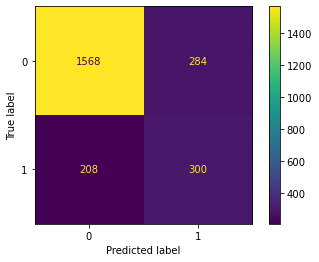

In [101]:
# Mengevaluasi menggunakan metriks confusion_matrix pada Train Set model SVC() dengan hyperparameternya

cm = confusion_matrix(y_train, y_pred_train, labels=clf_svc_hyp.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf_svc_hyp.classes_)

disp.plot()
plt.show()

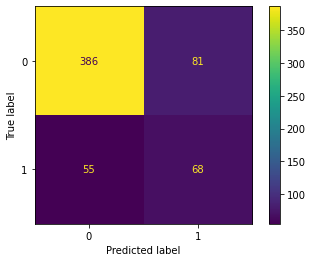

In [102]:
# Mengevaluasi menggunakan metriks confusion_matrix pada Test Set model SVC() dengan hyperparameternya

cm = confusion_matrix(y_test, y_pred_test, labels=clf_svc_hyp.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf_svc_hyp.classes_)

disp.plot()
plt.show()

Berdasarkan evaluasi metriks menggunakan classsification_report(), diperoleh bahwa pemodelan SVC() dengan parameter default menunjukan nilai accuracy_score yang lebih tinggi dibandingkan dengan pemodelan SVC() dengan hyperparameter, yaitu pada accuracy score train set & test set pada default (acc= 0.85 dan acc= 0.84) sedangkan train set & test set pada hyperparameters (acc = 0.79 dan acc = 0.77), dimana terjadi penurunan, namun mengingat proporsi data kelas 0 dan kelas 1 *imbalance* atau proporsi kelas 0 lebih banyak 3x dari kelas 1, maka evaluasi perlu dilihat dari aspek yang lain.

Adapun evaluasi dapat kita tinjau dengan melihat metriks recall atau disebut juga sebagai true positive rate (TPR) pada evaluasi kelas = 1, yaitu suatu metode untuk melihat seberapa banyak jumlah data yang bisa diprediksi benar positive dari keseluruhan data kelas positif oleh model. Pada kasus ini, setelah dilakukan hyperparameter tuning dimana dengan memodifikasi nilai C menjadi lebih tinggi, class_weight didefinisikan dibuat seimbang ('balanced') antara kelas 0 & kelas 1, dan nilai gamma diatur menjadi 0.01 dari defaultnya 'scale' pada kernel rbf, maka diperoleh hasil recall yang jauh lebih baik daripada pemodelan defaultnya, dapat dilihat terjadi kenaikan score sebesar 0.15 poin pada train set dan kenaikan score 0.19 poin pada test set, artinya pemodelan dengan hyperparameter mampu menangkap true positive yang jauh lebih baik pada kelas = 1.

Sementara, untuk evaluasi kelas = 0 dengan menggunakan metrics f1-score sebagai metode untuk mewakili nilai metrics terkecil di antara precision/recall dengan pendekatan harmonic mean dari precision dan recall, diperoleh hasil yang baik antara score train set dan test setnya baik dengan default maupun dengan hyperparameters, selisih 0.1 poin saja.

Pada visualisasi confusion matrix dapat dilihat bahwa masih cukup banyak terjadi kesalahan prediksi dimana dapat dilihat dari banyak jumlah False Positive dan False Negative dari matrix di atas.

In [107]:
# Membuat plot ROC/AUC skor berdasarkan nilai prediksi y terhadap y_train pada tinjauan kelas = 1

y_pred_train_proba = clf_svc_hyp.predict_proba(X_train_final)[:, 1]
fpr, tpr, _ = roc_curve(y_train, y_pred_train_proba)
auc = roc_auc_score(y_train, y_pred_train_proba)

In [108]:
# Menyajikan dalam bentuk dataframe

pd.DataFrame({'fpr':fpr, 'tpr':tpr})

,fpr,tpr
0,0.000000,0.000000
1,0.000000,0.001969
2,0.000540,0.001969
3,0.000540,0.023622
4,0.001080,0.023622
...,...,...
553,0.958423,0.996063
554,0.958423,0.998031
555,0.979482,0.998031
556,0.979482,1.000000


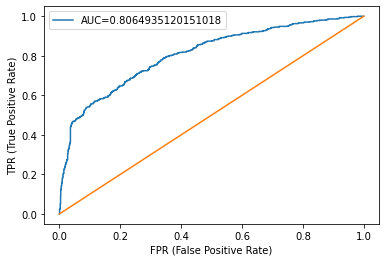

In [109]:
# Melihat visualisasi plot ROC/AUC terhadap train pada tinjauan evaluasi kelas = 1

plt.plot(fpr, tpr, label=f"AUC={auc}")
plt.plot([0,1],[0,1]);
plt.ylabel("TPR (True Positive Rate)")
plt.xlabel("FPR (False Positive Rate)")
plt.legend()

Adapun evaluasi metrics lainnya, yaitu menggunakan evaluasi metrics roc_auc_score(), dimana metrics ROC (receiver operating characteristics) merupakan metrics evaluasi dari klasifikasi biner (binary classification) berdasarkan kurva probabilitas TPR terhadap FPR pada berbagai rentang variasi nilai treshold (tidak sensitif terhadap treshold), sementara AUC (area under curve of ROC) merupakan ukuran kemampuan suatu model dalam membedakan suatu kelas, atau dapat disebut sebagai ringkasan dari luasan kurva dibawah ROC.

Adapaun nilai AUC skor (tinjuan evaluasi kelas = 1) yang diperoleh yaitu 0.806 atau berada pada rentang 0.5 < AUC =< 1.0, artinya model dapat membedakan kelas positif dan negatif lebih baik, atau memiliki kemampuan untuk menghasilkan TP (true positve) dan TN (true negative) lebih banyak daripada FP (false positive) dan FN (false negative).

Saran untuk pemodelan yang akan datang ialah sebagai berikut:
- Sebagaimana diketahui bahwa proporsi data antara kelas 0 dan kelas 1 berbeda 3x, terjadi *imbalance data* hal ini dimungkinkan terjadi karena sampling yang dilakukan kurang merepresentasikan kelas dengan baik atau under sampling, maka usulan perbaikan ialah sebagai berikut:
    - melakukan resampling dengan jumlah sampel yang lebih luas dan merepresentasikan kelas 0 dan kelas 1 lebih baik agar dapat menangkap pola dari populasi yang sesungguhnya.
    - apabila imbalance data memang sudah mencerminkan kondisi populasi yang sesungguhnya, maka metode SMOTE dapat dilakukan untuk mengatasi hal tersebut
- Pemodelan SVM dapat dilakukan adjustment kembali menggunakan kombinasi parameter yang lebih banyak, sebagai contoh pada parameter class_weight pada suatu dictionary perbanding kelas 0 dan kelas 1 yang lebih beragam. Selain itu, mencoba kombinasi parameter kernel 'poly' dengan mengatur parameter degree, gamma, dan C nya sedemikian rupa menggunakan GridSearchCV()
- Dilakukan proses fit & transform dapat menggunakan pipeline untuk keringkasan waktu dan kemudahan apabila dilakukan deployment
- Pemodelan jenis lain perlu dipertimbangkan pada hasil cross_valid_score() yang tidak terpaut jauh dengan pemodelan SVC(). Apabila dilakukan hyperparameter tuning pada model alternatif lain tersebut terutama pada ensemble learning lain maka mungkin hasil dapat menunjukan hasil yang bisa jadi lebih baik, dimana diperoleh model yang high precision sehingga angka false positve dan false negative dapat turun.
- Dilakukan feature engineering yang lebih komprehensif sehingga diperoleh hasil preprocessing yang lebih baik, dengan mempertimbangkan feature-feature lain dari dataset.

## 9- Model Saving

In [110]:
# Menyimpan pemodelan pickle dan list untuk model inference 

import joblib
import json

with open('clf_svc_hyp.pkl', 'wb') as file_1:
  joblib.dump(clf_svc_hyp, file_1)

with open('scaler.pkl', 'wb') as file_2:
  joblib.dump(scaler, file_2)

with open('encoder.pkl', 'wb') as file_3:
  joblib.dump(encoder, file_3)

with open('num_columns.txt', 'w') as file_4:
  json.dump(num_columns, file_4)

with open('cat_columns.txt', 'w') as file_5:
  json.dump(cat_columns, file_5)

with open('enc_columns.txt', 'w') as file_6:
  json.dump(enc_columns, file_6)

## 10- Model Inference

> Model yang sudah dilatih akan dicoba pada data yang bukan termasuk ke dalam train-set ataupun test-set. Data ini harus dalam format yang asli, bukan data yang sudah di-scaled.

### Model Loading

In [111]:
# Memuat ulang pemodelan pickle dan list untuk model inference 

with open('clf_svc_hyp.pkl', 'rb') as file_1:
  clf_svc_hyp = joblib.load(file_1)

with open('scaler.pkl', 'rb') as file_2:
  scaler = joblib.load(file_2)

with open('encoder.pkl', 'rb') as file_3:
  encoder = joblib.load(file_3)

with open('num_columns.txt', 'r') as file_4:
  num_columns = json.load(file_4)

with open('cat_columns.txt', 'r') as file_5:
  cat_columns = json.load(file_5)

with open('enc_columns.txt', 'r') as file_6:
  enc_columns = json.load(file_6)

In [112]:
# Menampilkan Inference Set

data_inf

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,390000.0,2,3,1,46.0,-2.0,-2.0,-2.0,-2.0,-2,...,8976.0,909.0,17682.0,7097.0,6548.0,8976.0,909.0,17682.0,12710.0,0
1,190000.0,1,2,2,41.0,0.0,0.0,0.0,0.0,0,...,37160.0,38237.0,39464.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,0
2,150000.0,2,1,2,25.0,0.0,0.0,0.0,0.0,0,...,33843.0,37015.0,30074.0,2000.0,1417.0,1256.0,4429.0,1000.0,0.0,0
3,240000.0,2,2,1,31.0,2.0,0.0,0.0,0.0,0,...,72543.0,73011.0,73484.0,3100.0,2400.0,2367.0,2435.0,2500.0,3000.0,1
4,150000.0,2,1,2,30.0,0.0,0.0,0.0,0.0,0,...,142419.0,145100.0,153229.0,5520.0,5200.0,5100.0,5300.0,10900.0,0.0,0
5,330000.0,2,1,2,31.0,-1.0,-1.0,-1.0,-1.0,-1,...,1665.0,166.0,0.0,7565.0,32096.0,1665.0,166.0,0.0,16705.0,0
6,120000.0,2,2,2,23.0,0.0,0.0,0.0,0.0,0,...,83592.0,22321.0,32150.0,6019.0,5000.0,5000.0,2000.0,20000.0,10000.0,0
7,170000.0,2,1,2,42.0,-1.0,-1.0,-1.0,-1.0,-1,...,316.0,948.0,632.0,316.0,316.0,316.0,948.0,0.0,0.0,0
8,50000.0,1,1,2,36.0,2.0,2.0,0.0,0.0,0,...,33545.0,46832.0,24101.0,0.0,1973.0,1784.0,845.0,1750.0,1010.0,1
9,50000.0,2,1,2,26.0,-1.0,-1.0,-1.0,-1.0,-1,...,1713.0,651.0,646.0,651.0,1072.0,1713.0,651.0,646.0,651.0,1


In [113]:
# Membuat dataframe baru untuk menandai baris yang mempunyai nilai '-2.0' pada fitur pay_0 s/d pay_6 (nantinya akan dilakukan prosedur imputasi nilai modusnya)

data_inf['pay_min_2'] = np.where(((data_inf['pay_0'] == -2.0) | (data_inf['pay_2'] == -2.0) | (data_inf['pay_3'] == -2.0) | (data_inf['pay_4'] == -2.0) | (data_inf['pay_5'] == -2.0) | (data_inf['pay_6'] == -2.0)), 1, 0)

In [114]:
# Melakukan imputasi pada baris di data_inf yang mempunyai nilai '-2.0'  pada fitur pay_0 s/d pay_6 dengan nilai modusnya yaitu 0


data_inf['pay_0'] = data_inf['pay_0'].replace(-2.0, 0)
data_inf['pay_2'] = data_inf['pay_2'].replace(-2.0, 0)
data_inf['pay_3'] = data_inf['pay_3'].replace(-2.0, 0)
data_inf['pay_4'] = data_inf['pay_4'].replace(-2.0, 0)
data_inf['pay_5'] = data_inf['pay_5'].replace(-2.0, 0)
data_inf['pay_6'] = data_inf['pay_6'].replace(-2.0, 0)

In [115]:
# Memisahkan data_inf berdasarkan jenis datanya untuk keperluan normalisasi dan encoding

data_inf_num = data_inf[num_columns]
data_inf_cat = data_inf[cat_columns]

In [116]:
# Melakukan normalisasi (feature scaling) dan encoding pada data_inf_num & data_inf_cat

data_inf_num_scaled = scaler.transform(data_inf_num)
data_inf_cat_encoded = encoder.transform(data_inf_cat).toarray()

In [117]:
# Menggabungkan kembali hasil normalisasi dan encoding ke dalam satu arrays

data_inf_final = np.concatenate([data_inf_num_scaled, data_inf_cat_encoded], axis=1)

In [118]:
# Mengubah data_inf_final ke dalam dataframe

data_inf_final_df = pd.DataFrame(data_inf_final, columns=[num_columns+enc_columns])
data_inf_final_df

,limit_balance,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,pay_0_min1,pay_0_0,pay_0_1,...,pay_5_7,pay_6_min1,pay_6_0,pay_6_2,pay_6_3,pay_6_4,pay_6_6,pay_6_7,pay_min_2_0,pay_min_2_1
0,0.481013,0.390159,0.382209,0.523077,0.060231,1.173402,0.791370,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.227848,0.109951,0.116741,0.116550,0.132521,0.132723,0.124527,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.177215,0.109951,0.082711,0.073193,0.293467,0.066361,0.000000,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.291139,0.170423,0.140089,0.137937,0.161344,0.165904,0.186791,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.177215,0.303463,0.303526,0.297203,0.351179,0.723339,0.000000,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,0.405063,0.415888,1.873453,0.097028,0.010999,0.000000,1.040113,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6,0.139241,0.330896,0.291852,0.291375,0.132521,1.327228,0.622636,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7,0.202532,0.017372,0.018445,0.018415,0.062815,0.000000,0.000000,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8,0.050633,0.000000,0.115165,0.103963,0.055990,0.116132,0.062886,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9,0.050633,0.035789,0.062573,0.099825,0.043135,0.042869,0.040534,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### Inferencing

In [119]:
# Memprediksi y menggunakan model SVC() dengan Hyperparameters terhdapa data_inf_final

y_pred_inf = clf_svc_hyp.predict(data_inf_final)
y_pred_inf

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0], dtype=int64)

In [120]:
# Menyimpan dalam bentuk dataframe hasil klasifikasi menggunakan model SVC() dengan Hyperparameters

y_pred_inf_df = pd.DataFrame(y_pred_inf, columns=['classified_by_svc'])
y_pred_inf_df

,classified_by_svc
0,0
1,0
2,0
3,1
4,0
5,0
6,0
7,0
8,1
9,0


In [121]:
# Menyatukan dataframe hasil klasifikasi menggunakan odel SVC() dengan Hyperparameters ke dalam data_inf

data_inf_show  = pd.concat([data_inf, y_pred_inf_df], axis=1)
data_inf_show = data_inf_show.drop('pay_min_2', axis=1)
data_inf_show

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month,classified_by_svc
0,390000.0,2,3,1,46.0,0.0,0.0,0.0,0.0,0,...,909.0,17682.0,7097.0,6548.0,8976.0,909.0,17682.0,12710.0,0,0
1,190000.0,1,2,2,41.0,0.0,0.0,0.0,0.0,0,...,38237.0,39464.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,0,0
2,150000.0,2,1,2,25.0,0.0,0.0,0.0,0.0,0,...,37015.0,30074.0,2000.0,1417.0,1256.0,4429.0,1000.0,0.0,0,0
3,240000.0,2,2,1,31.0,2.0,0.0,0.0,0.0,0,...,73011.0,73484.0,3100.0,2400.0,2367.0,2435.0,2500.0,3000.0,1,1
4,150000.0,2,1,2,30.0,0.0,0.0,0.0,0.0,0,...,145100.0,153229.0,5520.0,5200.0,5100.0,5300.0,10900.0,0.0,0,0
5,330000.0,2,1,2,31.0,-1.0,-1.0,-1.0,-1.0,-1,...,166.0,0.0,7565.0,32096.0,1665.0,166.0,0.0,16705.0,0,0
6,120000.0,2,2,2,23.0,0.0,0.0,0.0,0.0,0,...,22321.0,32150.0,6019.0,5000.0,5000.0,2000.0,20000.0,10000.0,0,0
7,170000.0,2,1,2,42.0,-1.0,-1.0,-1.0,-1.0,-1,...,948.0,632.0,316.0,316.0,316.0,948.0,0.0,0.0,0,0
8,50000.0,1,1,2,36.0,2.0,2.0,0.0,0.0,0,...,46832.0,24101.0,0.0,1973.0,1784.0,845.0,1750.0,1010.0,1,1
9,50000.0,2,1,2,26.0,-1.0,-1.0,-1.0,-1.0,-1,...,651.0,646.0,651.0,1072.0,1713.0,651.0,646.0,651.0,1,0


## 11- Pengambilan Kesimpulan

> Pada bagian terakhir ini, harus berisi kesimpulan yang mencerminkan hasil yang didapat dengan objective yang sudah ditulis di bagian pengenalan.

### Jawaban Q1) Apakah fungsi parameter `criterion` pada Decision Tree? Jelaskan salah satu criterion yang kalian pahami!

Fungsi parameter `criterion` pada Dectison Tree digunakan untuk menentukan atau mengukur kualitas splitting dari seberapa besar nilai ketidakmurnian 'impurity' kelas dari suatu splitting/pemisahan pada suatu node ke subnodes di Decision Tree. Adapun `criterion` pada Decision Tree terdiri dari:
- gini impurity
- entropy
- log_loss

Adapaun salah satu criterion yang akan dijelaskan pada rubrik ini adalah *Gini Impurity*, yaitu suatu metode yang digunakan dalam algoritma Decision Tree untuk memutuskan pemisahan optimal dari root node dan/atau node nya. Adapun metode perhitungan sebagai berikut :
- Gi = 1 - Zigma(pi,k)^2, dimana pi,k = adalah rasio dari jumlah sampel kelas k terhadap seluruh sampel kelas di node
- Gi = 1 - (n. sampel Kelas 0/ n.jumlah sampel kelas)^2 - (n. sampel Kelas 1/ n. jumlah sampel kelas)^2, pada konteks klasifikasi biner kelas = 0 atau 1
- Nilai Gi maksimum ialah 0.5 dan minimum adalah 0

Adapun pemaknaan *Gini Impurity* sebagai berikut:
- Pada nilai *gini impurity* = 0.5 adalah nilai *gini impurity* paling tinggi dimana splitting yang terjadi pada node mampu memisahkan kelas sama besar jumlah data sampelnya, misalnya (n kelas 0 = 2, n kelas 1 = 2),
- Pada nilai *gini impurity* = 0 adalah nilai *gini impurity* paling rendah dimana splitting yang terjadi pada node mampu memisahkan hanya salah satu kelasnya saja, misalnya (n kelas 0 =3, n kelas 1 = 0)

### Jawaban Q2) Apakah fungsi dari `pruning` pada Tree model?

Pada dasarnya pemodelan algoritma Decision Tree atau model Tree lainnya memiliki kecenderungan overfit sebagai akibat proses splitting dari terus bergerak terlalu dalam hingga mencapai kondisi gini impurity = 0, sehingga untuk menghindari atau meminimalisasi kecenderungan overfit tersebut maka dapat dilakukan suatu teknik yang disebut `pruning`, yaitu teknik memilih bagian mana saja pada suatu tree yang akan dibuang (misal: daun, ranting, atau cabang) untuk membentuk suatu tree yang lebih baik atau membatasi suatu splitting agar tidak terlalu dalam/terlalu banyak pemisahan cabang Tree nya dengan cara mengatur sedemikian rupa parameter sehingga pemodelan algoritma lebih generalisasi/adaptif terhadap data diluar data training maka diharapkan dapat menghasilkan pemodelan yang tidak lagi overfit.

Adapun pruning yang dapat dilakukan pada Tree model ialah sebagai berikut:
- max_depth, yaitu tingkatan atau seberapa dalam dalam melakukan spliting cabang pada node 
- min_samples_leaf, yaitu jumlah minimal sampel yang tersedia untuk menjadi leaf (akhir decision)
- min_samples_split, yaitu jumlah minimal sampel yang diobservasi sebelum dilakukan splitting cabang pada node
- ccp_alpha, yaitu suatu parameter complexity α(≥0) yang menggunakan persamaan cost-complexity berikut Rα(T) = R(T)+α|T|

### Jawaban Q3) Bagaimana cara memilih `K` yang optimal pada KNN?

KNN merupakan suatu algoritma yang digunakan untuk memprediksi klasifikasi berdasarkan jarak di antara data poinnya dengan suatu nilai K, yaitu banyaknya jumlah tetangga terdekatnya. Adapun jarak antar poin dapat digunakan beberapa jenis, yaitu Euclidean, Manhattan, atau generalisasi keduanya yaitu Minkowski. Untuk memilih nilai K yang optimal pada KNN adalah dengan  nilai error:
- Didefinisikan error adalah 1 dikurangi nilai akurasi dari target prediksi terhadap trget test set nya
- Dilakukan suatu iterasi pada suatu rentang nilai K, pada *fit* dan *predict* dari target test set nya
- Dihitung nilai akurasi dari hasil prediksinya, lalu dihitung nilai errornya
- Diperoleh nilai K pada nilai error yang paling kecilnya

### Jawaban Q4) Jelaskan apa yang kalian ketahui tentang `Cross Validation`!

`Cross Validation` adalah suatu teknik yang digunakan pada machine learning untuk dilakukan training dan test terhadap sejumlah kemungkinan kombinasi / *fold* dari variasi dataset train dan test untuk memperoleh simulasi pemodelan yang jauh lebih baik daripada hanya sekedar satu train set dan satu test saja.

Pada train set yang akan dilakukan `Cross Validation`, train set tersebut akan dibagi sedemikian rupa sejumlah *fold* nya (biasanya sebanyak 5 lipatan/kombinasi) menjadi train set dan test dengan variasi yang berbeda, selanjutnya dilakukan `Cross Validation` dengan menentukan parameter-parameter apa saja yang hendak dilakukan validasi, dapat berupa jenis model maupun hyperparameternya, kemudian akan diperoleh suatu nilai akurasinya, yang dapat kita evaluasi nilai rata-ratanya serta standard deviasinya guna menentukan mana pemodelan yang baik performanya berdasarkan nilai rata-rata yang paling tinggi dan standard deviasi yang kecil (konsistensi simulasi pemodelannya baik) untuk dipilih sebagai best parameternya. Selanjutnya best parameter tersebut akan digunakan untuk retraining ulang data set train set awal sebelum dibagi, sehingga akan menghasil hasil pemodelan yang jauh lebih baik berdasarkan evaluasi dan pemilihan pada `Cross Validation`.

### Jawaban Q5) Jelaskan apa yang kalian ketahui tentang `Accuracy`, `Precision`, `Recall`, `F1 Score`!

Metrics `Accuracy`, `Precision`, `Recall`, dan `F1 Score` merupakan metrics yang digunakan untuk mengevaluasi suatu pemodelan klasifikasi. Adapun pemaknaan dari metrics tersebut akan dijelaskan sebagai berikut:

- Metrics - Accuracy: Suatu metode untuk melihat seberapa banyak jumlah data yang ditebak benar dari kesuluruhan data yang dipunya. 
   - Formula Acc = (n.TP + n.TN) / (n.TP + n.TN + n.FP + n.FN)
   - Kekurangan Accuracy:
        - tidak dapat digunakan sebagai metode evaluasi pemodelan apabila datanya imbalance, dimana kecenderungan data yang tersedia pada dunia nyata/kerja adalah imbalance

- Metrics - Precision: Suatu metode untuk melihat seberapa banyak jumlah data yang dari bernilai benar positve dari keseluruhan data yang diprediksi positif oleh model 
    - Formula Precision = (n.TP) / (n.TP + n.FP)
    - Untuk menurunkan false positive sekecil mungkin, maka dibutuhkan model yang sifatnya high precision. Atau dapat dikatakan, semakin besar precision maka semakin sedikit/kecil false positivenya

- Metrics - Recall / True Positive Rate (TPR): Suatu metode untuk melihat seberapa banyak jumlah data yang bisa diprediksi benar positive dari keseluruhan data kelas positif oleh model
    - Formula Precision = (n.TP) / (n.TP + n.FN)
    - Untuk menurunkan false negative sekecil mungkin, maka dibutuhkan model yang sifatnya high recall. Atau dapat dikatakan, semakin besar recall maka semakin sedikit/kecil false negativenya

- Metrics - F1 Score: Suatu metode untuk mewakili nilai metrics terkecil di antara precision/recall dengan pendekatan harmonic mean dari precision dan recall.
    - Formula Precision = 2(Precision x Recall) / (Precision + Recall)

### Ringkasan Pengerjaan dan Kesimpulan

Berdasarkan dataset yang telah diperoleh dari Google Cloud Platform untuk memprediksi pembagian kelas suatu `default_payment_next_month` {0, 1}. 

Adapun proses 'Exploratory Data Analysis' diperoleh informasi penting sebagai berikut:

- terdapat kekhasan tertentu pada kolom *features* `pay_0`, `pay_2`, `pay_3`, `pay_4`, `pay_5`, dan `pay_6` terhadap kolom *target* `default_payment_next_month`, yaitu secara umum didominasi oleh label `default_payment_next_month` = 0 untuk setiap kategori nilai, terkecuali pada kategori nilai >= `2.0` dimana menunjukan dominasi sebaliknya yaitu label `default_payment_next_month` = 1. Artinya, pada pay status nasabah yang memiliki label setidaknya minimal `2.0` atau lebih memiliki makna bahwa nasabah yang telah terlambat bayar selama 2 bulan atau lebih maka `default_payment_next_month` nya menjadi  =  1. 

- tidak terdapat kekhasan tertentu pada kolom *features* `sex`, `education_level`, dan `marital_status` terhadap kolom *target* `default_payment_next_month`, yaitu setiap kategori nilai seragam didominasi oleh label `default_payment_next_month` = 0. Sehingga, features `sex`, `education_level`, dan `marital_status` dianggap tidak memiliki korelasi yang cukup terhadap `default_payment_next_month`.

- terdapat kekhasan tertentu pada kolom features `limit_balance` terhadap kolom target `default_payment_next_month`, yaitu rata-rata `limit_balance` pada label `default_payment_next_month` = 0 lebih besar daripada label = 1. Sehingga, features `limit_balance` patut dipertimbangkan memiliki korelasi kuat terhadap `default_payment_next_month`.

- tidak terdapat kekhasan tertentu pada kolom features `bill_amt_1`, `bill_amt_2`, `bill_amt_3`, `bill_amt_4`, `bill_amt_5`, dan `bill_amt_6` terhadap kolom target `default_payment_next_month`, yaitu rata-rata diantaranya tidak terpaut jauh perbedaannya. 

- terdapat kekhasan tertentu pada kolom features `pay_amt_1`, `pay_amt_2`, `pay_amt_3`, `pay_amt_4`, `pay_amt_5`, dan `pay_amt_6` terhadap kolom target `default_payment_next_month` yaitu rata-rata diantaranya selalu lebih besar pada label `default_payment_next_month` = 0 dibandingkan label = 1. Sehingga, features `pay_amt_1`, `pay_amt_2`, `pay_amt_3`, `pay_amt_4`, `pay_amt_5`, dan `pay_amt_6`  dianggap memiliki korelasi yang cukup kuat terhadap `default_payment_next_month`.

- terdapat min value = -2.0 pada kolom `pay_0` s/d `pay_6` dimana berdasarkan informasi detail kolom dari GCP seharusnya label paling kecil ialah -1.0 (pay duly), maka perlu dilakukan tinjuan/analisis khusus untuk kondisi ini di prosedur berikutnya.

Adapun tahap preprocessing sebelum dilakukannya pemodelan secara umum adalah sebagai berikut:

- dilakukan pemisahan dataset menjadi inference-set (15 rows set), train-set (80% dari sisa setelah dipisah dengan inference-set), dan test-set (20% dari sisa setelah dipisah dengan inference-set).

- dilakukan *handling missing value* di train set & test set pada kolom `pay_0`, `pay_2`, `pay_3`, `pay_4`, `pay_5`, dan `pay_6` nilai `-2.0` dipertimbangkan sebagai *missing values* karena pada keterangan informasi di Google Cloud Platorm, hanya sebatas pada `-1.0` untuk keterangan pay duly (pembayaran tepat waktu), dimana *missingness* pada kolom tersebut bersifat MCAR. Adapun prosedur handling yang dapat dilakukan adalah dengan  metode *Imputation with Mode* + *adding 0/1 imputation* pada data di kolom bersifat *categorical* dan membuat kolom baru yang menandai rows yang telah dilakukan imputasi modus dengan memberikan value 0/1.

- dilakukan *handling outliers* di train set pada 'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', dan 'pay_amt_6' dilakukan dengan cara capping menggunakan winsoriser() karena persentasenya >10%  pada limit boundary IQR (tidak berdistribusi normal atau skewed distribution) menggunakan data/value modusnya untuk setiap kolomnya.

- *handling outliers* pada test set tidak dilakukan.

Berdasarkan analisis pada Exploratory Data Analysis pada kelompok *features* numerik maupun kategori, terdapat beberapa yang memiliki korelasi kuat terhadap pembagian kelas / klasifikasi `default_payment_next_month`. Adapun pendekatan pemilihan *feature* dilakukan justifikasi melalui analisis EDA meliputi heatmap correlation, visualisasi countplout, grouping & aggregating yaitu sebagai berikut:

- `limit_balance` : rata-rata `limit_balance` pada label `default_payment_next_month` = 0 lebih besar daripada label = 1.

- `pay_0`, `pay_2`, `pay_3`, `pay_4`, `pay_5`, dan `pay_6` : secara umum didominasi oleh label `default_payment_next_month` = 0 untuk setiap kategori nilai, terkecuali pada kategori nilai >= `2.0` dimana menunjukan dominasi sebaliknya yaitu label `default_payment_next_month` = 1.

-  `pay_amt_1`, `pay_amt_2`, `pay_amt_3`, `pay_amt_4`, `pay_amt_5`, dan `pay_amt_6` : rata-rata diantaranya selalu lebih besar pada label `default_payment_next_month` = 0 dibandingkan label = 1.

- `pay_min_2` : kolom yang melakukan *capture* imputasi pada *missing value* `pay_0`, `pay_2`, `pay_3`, `pay_4`, `pay_5`, dan `pay_6`, dimana kolom pay status tersebut juga merupakan *feature* yang memiliki korelasi kuat. 

Sementara, *feature* `sex`, `education_level`, `marital_status`, `age`, `bill_amt_1`, `bill_amt_2`, `bill_amt_3`, `bill_amt_4`, `bill_amt_5`, dan `bill_amt_6` memiliki korelasi yang lemah sehingga tidak dipilih.

Adapun model pemilihan model dan metriks evaluasi pada pemodelan ini adalah sebagai berikut:

- Pada kasus kali ini, dimana *objective* yang diharapakan terjadi ialah suatu pemodelan *supervised learning* untuk memprediksi klasifikasi `default_payment_next_month` dari dataset informasi terkait credit card, maka pemodelan akan dilakukan dengan berbagai algoritma/model sebagai berikut:
    1. **Logistic Regression** 
    2. **Support Vector Machine**
    3. **Decision Tree**
    4. **Random Forest**
    5. **KNN**
    6. **Naive Bayes**
    7. **Other Algoritm - Xtreme Gradient Boosting**

- dimana akan menghasilkan suatu *rules* yang nantinya dapat menentukan suatu probabilitas untuk diklasifikasikan kedalam suatu kelas `default_payment_next_month` = 0 atau = 1, yang diharapkan dapat diprediksi dengan mempelajari features dan target dari dataset yang telah ditraining.

Adapun model training dengan menggunakan parameter default (baseline model) dari setiap algoritma yang yang telah disebutkan, lalu akan dilakukan cross validation menggunakan cross_val_score() untuk mencari akurasi mean dan std untuk setiap model. Selanjutnya, akan dilakukan hyperparameter tuning menggunakan GridSearchCV() pada algoritma terbaik berdasarkan cross validation. Adapun hasil `Cross Validation` dari baseline model dinyatakan sebagai berikut:

- Berdasarkan evaluasi cross validation menggunakan cross_val_score() untuk mencari akurasi mean dan std untuk setiap model di atas, diperoleh bahwa hasil yang menunjukan angka akurasi mean() tertinggi ada pada model berikut:
    1. Model Logistic Regression dengan mean = 0.835 
    2. Model Support Vector Machine Classifier dengan mean = 0.833

- Pada 2 model dengan mean terbaik tersebut kemudian dipertimbangkan kembali nilai standar deviasinya std() untuk melihat konsistensi akurasi pada proses cross validation cross_val_score() tersebut, maka dipilih model **Support Vector Machine Classifier**, dimana model tersebut memiliki nilai std() yang lebih kecil 0.005 daripada std() milik Logistic Regression.

- Adapun **Support Vector Machine Classifier** sebagai baseline model selanjutnya akan dilakukan hyperparameter tuning menggunakan GridSearchCV() untuk memperoleh metrics-metrics evaluasi yang lebih baik lagi.

Adapun hyperparameter yang akan dilakukan simulasi menggunakan GridSearchCV() akan dipilih berdasarkan evaluasi nilai scoring 'roc_auc' yang lebih tinggi, dimana AUC scorenya semakin mendekati 100% semakin baik, disamping itu evaluasi  scoring 'roc_auc' dipilih karena evaluasi tersebut mampu melihat klasifikasi dari sebaran kelas lebih objektif daripada accuracy_score.

- Berikut adalah parameter dan nilai set dari parameter yang akan dilakukan tuning menggunakan GridSearchCV():
    - Kernel = 'rbf', 'linear'
    - C = 0.01, 0.1, 1.0, 10
    - gamma = 0.01, 0.1, 1.0, 10, 'scale' (untuk kernel rbf)
    - class_weight = None, 'balanced'
- Diperoleh best parameters untuk hyperparameter dari model SVC() dengan menggunakan evaluasi score auc_score diperoleh sebagai berikut:
    - Best parameters: {'C': 10, 'class_weight': 'balanced', 'gamma': 0.01, 'kernel': 'rbf'}
    - Best AUC score: 0.77
- Dilakukan retrained model menggunakan hyperparameters tersebut untuk dilakukan prediksi klasifikasi dan evaluasi berdasarkan metriks-metriksnya.

Berdasarkan evaluasi metriks menggunakan classsification_report(), diperoleh bahwa pemodelan SVC() dengan parameter default menunjukan nilai accuracy_score yang lebih tinggi dibandingkan dengan pemodelan SVC() dengan hyperparameter, yaitu pada accuracy score train set & test set pada default (acc= 0.85 dan acc= 0.84) sedangkan train set & test set pada hyperparameters (acc = 0.79 dan acc = 0.77), dimana terjadi penurunan, namun mengingat proporsi data kelas 0 dan kelas 1 *imbalance* atau proporsi kelas 0 lebih banyak 3x dari kelas 1, maka evaluasi perlu dilihat dari aspek yang lain.

Adapun evaluasi dapat kita tinjau dengan melihat metriks recall atau disebut juga sebagai true positive rate (TPR) pada evaluasi kelas = 1, yaitu suatu metode untuk melihat seberapa banyak jumlah data yang bisa diprediksi benar positive dari keseluruhan data kelas positif oleh model. Pada kasus ini, setelah dilakukan hyperparameter tuning dimana dengan memodifikasi nilai C menjadi lebih tinggi, class_weight didefinisikan dibuat seimbang ('balanced') antara kelas 0 & kelas 1, dan nilai gamma diatur menjadi 0.01 dari defaultnya 'scale' pada kernel rbf, maka diperoleh hasil recall yang jauh lebih baik daripada pemodelan defaultnya, dapat dilihat terjadi kenaikan score sebesar 0.15 poin pada train set dan kenaikan score 0.19 poin pada test set, artinya pemodelan dengan hyperparameter mampu menangkap true positive yang jauh lebih baik pada kelas = 1.

Sementara, untuk evaluasi kelas = 0 dengan menggunakan metrics f1-score sebagai metode untuk mewakili nilai metrics terkecil di antara precision/recall dengan pendekatan harmonic mean dari precision dan recall, diperoleh hasil yang baik antara score train set dan test setnya baik dengan default maupun dengan hyperparameters, selisih 0.1 poin saja.

Pada visualisasi confusion matrix dapat dilihat bahwa masih cukup banyak terjadi kesalahan prediksi dimana dapat dilihat dari banyak jumlah False Positive dan False Negative dari matrix di atas.

Adapun evaluasi metrics lainnya, yaitu menggunakan evaluasi metrics roc_auc_score(), dimana metrics ROC (receiver operating characteristics) merupakan metrics evaluasi dari klasifikasi biner (binary classification) berdasarkan kurva probabilitas TPR terhadap FPR pada berbagai rentang variasi nilai treshold (tidak sensitif terhadap treshold), sementara AUC (area under curve of ROC) merupakan ukuran kemampuan suatu model dalam membedakan suatu kelas, atau dapat disebut sebagai ringkasan dari luasan kurva dibawah ROC.

Adapaun nilai AUC skor (tinjuan evaluasi kelas = 1) yang diperoleh yaitu 0.806 atau berada pada rentang 0.5 < AUC =< 1.0, artinya model dapat membedakan kelas positif dan negatif lebih baik, atau memiliki kemampuan untuk menghasilkan TP (true positve) dan TN (true negative) lebih banyak daripada FP (false positive) dan FN (false negative).

Saran untuk pemodelan yang akan datang ialah sebagai berikut:
- Sebagaimana diketahui bahwa proporsi data antara kelas 0 dan kelas 1 berbeda 3x, terjadi *imbalance data* hal ini dimungkinkan terjadi karena sampling yang dilakukan kurang merepresentasikan kelas dengan baik atau under sampling, maka usulan perbaikan ialah sebagai berikut:
    - melakukan resampling dengan jumlah sampel yang lebih luas dan merepresentasikan kelas 0 dan kelas 1 lebih baik agar dapat menangkap pola dari populasi yang sesungguhnya.
    - apabila imbalance data memang sudah mencerminkan kondisi populasi yang sesungguhnya, maka metode SMOTE dapat dilakukan untuk mengatasi hal tersebut
- Pemodelan SVM dapat dilakukan adjustment kembali menggunakan kombinasi parameter yang lebih banyak, sebagai contoh pada parameter class_weight pada suatu dictionary perbanding kelas 0 dan kelas 1 yang lebih beragam. Selain itu, mencoba kombinasi parameter kernel 'poly' dengan mengatur parameter degree, gamma, dan C nya sedemikian rupa menggunakan GridSearchCV()
- Dilakukan proses fit & transform dapat menggunakan pipeline untuk keringkasan waktu dan kemudahan apabila dilakukan deployment
- Pemodelan jenis lain perlu dipertimbangkan pada hasil cross_valid_score() yang tidak terpaut jauh dengan pemodelan SVC(). Apabila dilakukan hyperparameter tuning pada model alternatif lain tersebut terutama pada ensemble learning lain maka mungkin hasil dapat menunjukan hasil yang bisa jadi lebih baik, dimana diperoleh model yang high precision sehingga angka false positve dan false negative dapat turun.
- Dilakukan feature engineering yang lebih komprehensif sehingga diperoleh hasil preprocessing yang lebih baik, dengan mempertimbangkan feature-feature lain dari dataset.

### **Thank you! Any feedback is very appreciated**